In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as tck
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import re
import sys
import seaborn as sns
from itertools import product
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind, ttest_rel
import statsmodels.stats.multitest as multi
import umap.umap_ as umap
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter
from lifelines.plotting import add_at_risk_counts
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, label_binarize, StandardScaler
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import GEOparse

# data cleaning (could be improved)

In [2]:
geo_expr = pd.read_csv("GSE209998_AUR_129_UQN.txt.gz",sep='\t')
gse = GEOparse.get_GEO(geo="GSE209998", destdir="./")


02-Sep-2024 03:22:05 DEBUG utils - Directory ./ already exists. Skipping.
02-Sep-2024 03:22:05 INFO GEOparse - File already exist: using local version.
02-Sep-2024 03:22:05 INFO GEOparse - Parsing ./GSE209998_family.soft.gz: 
02-Sep-2024 03:22:05 DEBUG GEOparse - DATABASE: GeoMiame
02-Sep-2024 03:22:05 DEBUG GEOparse - SERIES: GSE209998
02-Sep-2024 03:22:05 DEBUG GEOparse - PLATFORM: GPL16791
02-Sep-2024 03:22:05 DEBUG GEOparse - SAMPLE: GSM6412478
02-Sep-2024 03:22:05 DEBUG GEOparse - SAMPLE: GSM6412479
02-Sep-2024 03:22:05 DEBUG GEOparse - SAMPLE: GSM6412480
02-Sep-2024 03:22:05 DEBUG GEOparse - SAMPLE: GSM6412481
02-Sep-2024 03:22:05 DEBUG GEOparse - SAMPLE: GSM6412482
02-Sep-2024 03:22:05 DEBUG GEOparse - SAMPLE: GSM6412483
02-Sep-2024 03:22:05 DEBUG GEOparse - SAMPLE: GSM6412484
02-Sep-2024 03:22:05 DEBUG GEOparse - SAMPLE: GSM6412485
02-Sep-2024 03:22:05 DEBUG GEOparse - SAMPLE: GSM6412486
02-Sep-2024 03:22:05 DEBUG GEOparse - SAMPLE: GSM6412487
02-Sep-2024 03:22:05 DEBUG GEOpars

In [3]:
geo_expr = geo_expr.set_index('Unnamed: 0')
geo_expr = geo_expr.transform(lambda x: np.log2(x+1)).copy()
geo_expr

,AUR-AFEA-TTP1-A-1-0-R-A741-41,AUR-AFEA-TTM4-A-1-1-R-A742-41,AUR-AFEA-TTM2-A-1-1-R-A742-41,AUR-AFEA-TTM1-A-1-1-R-A742-41,AUR-AFEA-TTM3-A-1-1-R-A742-41,AUR-AFEA-TTM6-A-1-0-R-A741-41,AUR-AFE7-TTP2-A-1-1-R-A742-41,AUR-AFE7-TTM2-A-1-1-R-A742-41,AUR-AFE7-TTM1-A-1-1-R-A742-41,AUR-AFE7-TTM3-A-1-1-R-A742-41,...,AUR-AD9F-TTM3-A-1-1-R-A542-39,AUR-AD9F-TTM1-A-1-1-R-A542-39,AUR-AD9F-TTM2-A-1-1-R-A542-39,AUR-AFUG-TTM1-A-1-1-R-A743-41,AUR-AFE5-NT1-A-1-1-R-A742-41,AUR-AFE9-NT1-A-1-1-R-A742-41,AUR-AFE6-NT1-A-1-1-R-A742-41,AUR-AFE4-NT1-A-1-1-R-A742-41,AUR-AE5G-NT1-A-1-1-R-A742-41,AUR-AFEC-NT1-A-1-1-R-A742-41
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
DDX11L1,7.828426,3.373582,6.372048,7.444947,5.817905,6.161779,7.575260,6.188895,7.023792,6.746183,...,2.683444,1.558111e-08,4.126836,3.841907,7.500075,4.670424,4.314567,0.000000,4.452199,0.041440
WASH7P,8.124444,8.842768,9.848245,10.463439,10.103345,9.001765,11.321133,10.436641,10.204309,10.075153,...,10.017605,1.074817e+01,9.999377,9.781507,11.810332,10.214207,10.093156,8.460122,9.237296,9.785889
MIR6859-3,0.000000,0.314047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RP11-34P13.3,0.000000,0.997478,1.817469,0.000000,2.581638,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.971519e+00,0.000000,0.000000,0.000000,1.465462,0.000000,0.000000,0.000000,0.000000
MIR1302-9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND6,10.606628,10.789111,14.517037,20.083202,16.709640,12.282471,14.774991,12.210786,13.227075,12.313766,...,10.306040,1.033147e+01,8.886567,11.265290,11.887459,13.109145,11.568040,11.533261,10.999944,11.398435
MT-TE,0.000000,1.558524,3.803120,5.177193,3.283530,1.604326,3.545728,3.763202,1.543594,4.880252,...,0.000000,0.000000e+00,0.000000,4.544533,1.614406,3.447830,2.676610,2.402099,2.079022,0.000000
MT-CYB,14.893013,15.634890,16.594082,21.099987,18.060632,16.074819,18.007374,14.709999,16.433927,16.367010,...,15.506737,1.496218e+01,13.791072,14.314917,13.966617,16.441195,15.309361,16.632059,15.495368,15.716602


In [4]:
geo_clin_matrix= gse.phenotype_data.copy()

geo_clin_matrix['sample_id'] = [tit.split(' ')[-1][1:-1] for tit in geo_clin_matrix.title]
geo_clin_matrix['patient_id'] = [pat.split('-')[1] for pat in geo_clin_matrix.sample_id]

In [5]:
#geo_clin_matrix.to_csv('AURORA_dataset_clinical_matrix.csv')

In [6]:
common_samps=geo_expr.columns.intersection(geo_clin_matrix['sample_id'])
geo_expr = geo_expr[common_samps]
geo_clin_matrix = geo_clin_matrix[geo_clin_matrix.sample_id.isin(common_samps)]

In [7]:

geo_clin_matrix['characteristics_ch1.0.disease'].value_counts()


characteristics_ch1.0.disease
Metastatic tumor    79
Primary tumor       44
Normal tissue        6
Name: count, dtype: int64

In [8]:
geo_clin_matrix.iloc[:,10:21]

,characteristics_ch1.0.disease,characteristics_ch1.1.tissue,characteristics_ch1.2.genotype,characteristics_ch1.3.treatment,characteristics_ch1.4.time,treatment_protocol_ch1,growth_protocol_ch1,molecule_ch1,extract_protocol_ch1,description,data_processing
GSM6412478,Primary tumor,Breast,Female,Pre-treatment,Autopsy,Hematoxylin and Eosin (H&E) stained sections f...,Pathology quality control was performed on eac...,total RNA,RNA was extracted from frozen tissues using a ...,"FFPE,AUR-AFEA-TTP1-A-1-0-R-A741-41",Quality-control-passed reads were aligned to t...
GSM6412479,Metastatic tumor,Lymph node,Female,Metastasis,Autopsy,Hematoxylin and Eosin (H&E) stained sections f...,Pathology quality control was performed on eac...,total RNA,RNA was extracted from frozen tissues using a ...,"Fresh frozen,AUR-AFEA-TTM4-A-1-1-R-A742-41",Quality-control-passed reads were aligned to t...
GSM6412480,Metastatic tumor,Brain,Female,Metastasis,Autopsy,Hematoxylin and Eosin (H&E) stained sections f...,Pathology quality control was performed on eac...,total RNA,RNA was extracted from frozen tissues using a ...,"Fresh frozen,AUR-AFEA-TTM2-A-1-1-R-A742-41",Quality-control-passed reads were aligned to t...
GSM6412481,Metastatic tumor,Brain,Female,Metastasis,Autopsy,Hematoxylin and Eosin (H&E) stained sections f...,Pathology quality control was performed on eac...,total RNA,RNA was extracted from frozen tissues using a ...,"Fresh frozen,AUR-AFEA-TTM1-A-1-1-R-A742-41",Quality-control-passed reads were aligned to t...
GSM6412482,Metastatic tumor,Lung,Female,Metastasis,Autopsy,Hematoxylin and Eosin (H&E) stained sections f...,Pathology quality control was performed on eac...,total RNA,RNA was extracted from frozen tissues using a ...,"Fresh frozen,AUR-AFEA-TTM3-A-1-1-R-A742-41",Quality-control-passed reads were aligned to t...
...,...,...,...,...,...,...,...,...,...,...,...
GSM6412602,Normal tissue,Brain,Female,Normal tissue,Autopsy,Hematoxylin and Eosin (H&E) stained sections f...,Pathology quality control was performed on eac...,total RNA,RNA was extracted from frozen tissues using a ...,"Fresh frozen,AUR-AFE9-NT1-A-1-1-R-A742-41",Quality-control-passed reads were aligned to t...
GSM6412603,Normal tissue,Lung,Female,Normal tissue,Autopsy,Hematoxylin and Eosin (H&E) stained sections f...,Pathology quality control was performed on eac...,total RNA,RNA was extracted from frozen tissues using a ...,"Fresh frozen,AUR-AFE6-NT1-A-1-1-R-A742-41",Quality-control-passed reads were aligned to t...
GSM6412604,Normal tissue,Liver,Female,Normal tissue,Autopsy,Hematoxylin and Eosin (H&E) stained sections f...,Pathology quality control was performed on eac...,total RNA,RNA was extracted from frozen tissues using a ...,"Fresh frozen,AUR-AFE4-NT1-A-1-1-R-A742-41",Quality-control-passed reads were aligned to t...
GSM6412605,Normal tissue,Breast,Female,Normal tissue,Non-Autopsy,Hematoxylin and Eosin (H&E) stained sections f...,Pathology quality control was performed on eac...,total RNA,RNA was extracted from frozen tissues using a ...,"Fresh frozen,AUR-AE5G-NT1-A-1-1-R-A742-41",Quality-control-passed reads were aligned to t...


In [9]:
met_pat = geo_clin_matrix[geo_clin_matrix['source_name_ch1']=='Metastatic tumor']['patient_id'].values
primtum_pat = geo_clin_matrix[geo_clin_matrix['source_name_ch1']=='Primary tumor']['patient_id'].values

In [10]:
common_pat = pd.Index(met_pat).intersection(primtum_pat)


In [11]:
geo_clin_matrix[geo_clin_matrix['patient_id'].isin(common_pat)]['characteristics_ch1.3.treatment'].value_counts()


characteristics_ch1.3.treatment
Metastasis        63
Pre-treatment     23
Post-treatment    15
Normal tissue      6
Unknown            1
Name: count, dtype: int64

In [12]:
#liver has two different normal tissue samples. check dates probably remove duplicates
geo_clin_matrix[geo_clin_matrix.columns[geo_clin_matrix.columns.str.contains("characteristics")]]


,characteristics_ch1.0.disease,characteristics_ch1.1.tissue,characteristics_ch1.2.genotype,characteristics_ch1.3.treatment,characteristics_ch1.4.time
GSM6412478,Primary tumor,Breast,Female,Pre-treatment,Autopsy
GSM6412479,Metastatic tumor,Lymph node,Female,Metastasis,Autopsy
GSM6412480,Metastatic tumor,Brain,Female,Metastasis,Autopsy
GSM6412481,Metastatic tumor,Brain,Female,Metastasis,Autopsy
GSM6412482,Metastatic tumor,Lung,Female,Metastasis,Autopsy
...,...,...,...,...,...
GSM6412602,Normal tissue,Brain,Female,Normal tissue,Autopsy
GSM6412603,Normal tissue,Lung,Female,Normal tissue,Autopsy
GSM6412604,Normal tissue,Liver,Female,Normal tissue,Autopsy
GSM6412605,Normal tissue,Breast,Female,Normal tissue,Non-Autopsy


In [13]:
geo_clin_matrix[geo_clin_matrix['source_name_ch1']=='Primary tumor']['patient_id'].value_counts()

patient_id
AFEA    1
AFE7    1
AD9G    1
AFE5    1
AG0N    1
AG0M    1
AG0J    1
AFSP    1
AF9A    1
AF98    1
AF95    1
AFSL    1
AFR5    1
AE6Y    1
AE5H    1
AFUI    1
AER7    1
AER6    1
AFEC    1
AG12    1
AERX    1
AERW    1
AFSO    1
AFR3    1
AE5G    1
AF94    1
AFE4    1
AFUN    1
AFUL    1
AFKB    1
AEPZ    1
AER8    1
AFKF    1
AFUM    1
AFE9    1
AER2    1
AFE6    1
AFR4    1
AE6X    1
AFKD    1
AER4    1
AD9J    1
AFUO    1
AFR2    1
Name: count, dtype: int64

In [14]:
geo_clin_matrix[geo_clin_matrix['source_name_ch1']=='Metastatic tumor']['patient_id'].value_counts()

patient_id
AER6    8
AFEA    5
AFE9    4
AFE7    3
AFEC    3
AFE4    3
AD9H    3
AD9E    3
AD9F    3
AFUK    2
AD9G    2
AFE5    2
AFE6    2
AER2    2
AG0N    1
AG0M    1
AFUI    1
AE5H    1
AE6Y    1
AFR5    1
AFSL    1
AF95    1
AF98    1
AF9A    1
AFSP    1
AG0J    1
AFR3    1
AER7    1
AERX    1
AERW    1
AFSO    1
AG12    1
AER8    1
AEPZ    1
AFKB    1
AFUL    1
AFUN    1
AF94    1
AE5G    1
AFUM    1
AERY    1
AE6X    1
AFR4    1
AFKF    1
AFUP    1
AD9I    1
ADCB    1
AFUG    1
Name: count, dtype: int64

In [15]:
geo_clin_matrix[geo_clin_matrix['source_name_ch1']=='Metastatic tumor']['characteristics_ch1.1.tissue'].value_counts()


characteristics_ch1.1.tissue
Liver          18
Lymph node     11
Brain           9
Lung            8
Chest           7
Soft tissue     4
Adrenal         3
Skin            3
Pleura          3
Ovary           3
Bone            2
Thyroid         1
Spleen          1
Diaphragm       1
Rectum          1
Peritoneum      1
Stomach         1
Uterus          1
Pericardium     1
Name: count, dtype: int64

In [16]:
unwanted_itg=['ITGB3BP','ITGB1BP1','ITGA9-AS1','ITGB5-AS1','ITGB1P1','ITGB2-AS1','ITGB1BP2']
geo_expr=geo_expr.loc[~geo_expr.index.isin(unwanted_itg)]
itg_expr = geo_expr.loc[geo_expr.index.str.contains('ITG')]
itg_expr

,AUR-AFEA-TTP1-A-1-0-R-A741-41,AUR-AFEA-TTM4-A-1-1-R-A742-41,AUR-AFEA-TTM2-A-1-1-R-A742-41,AUR-AFEA-TTM1-A-1-1-R-A742-41,AUR-AFEA-TTM3-A-1-1-R-A742-41,AUR-AFEA-TTM6-A-1-0-R-A741-41,AUR-AFE7-TTP2-A-1-1-R-A742-41,AUR-AFE7-TTM2-A-1-1-R-A742-41,AUR-AFE7-TTM1-A-1-1-R-A742-41,AUR-AFE7-TTM3-A-1-1-R-A742-41,...,AUR-AD9F-TTM3-A-1-1-R-A542-39,AUR-AD9F-TTM1-A-1-1-R-A542-39,AUR-AD9F-TTM2-A-1-1-R-A542-39,AUR-AFUG-TTM1-A-1-1-R-A743-41,AUR-AFE5-NT1-A-1-1-R-A742-41,AUR-AFE9-NT1-A-1-1-R-A742-41,AUR-AFE6-NT1-A-1-1-R-A742-41,AUR-AFE4-NT1-A-1-1-R-A742-41,AUR-AE5G-NT1-A-1-1-R-A742-41,AUR-AFEC-NT1-A-1-1-R-A742-41
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ITGA10,9.042163,9.058264,10.066458,10.313530,10.100056,8.985996,10.118316,9.676966,10.214833,9.234469,...,8.776688,8.890847,8.456701,8.425357,9.101851,8.496383,10.620733,8.156264,9.241240,9.759266
ITGB6,10.126970,11.540429,11.569799,11.859223,12.131739,11.786744,10.371864,10.273120,9.576010,8.770896,...,9.746162,11.852040,10.837845,11.583490,0.000000,3.294337,11.251994,3.459432,13.364603,12.629216
ITGA6,12.354065,12.901162,13.543532,13.347392,13.153614,12.764451,15.727650,17.236520,16.515240,15.699356,...,12.572149,12.855140,13.092984,12.903908,10.415927,12.195009,12.013537,10.643348,14.198077,14.045885
ITGA4,11.313245,9.471967,9.988855,9.285913,10.611934,12.727867,10.090326,10.396719,9.884466,9.240648,...,8.607176,8.670399,11.499138,11.975100,5.469198,7.080673,11.309846,9.346515,10.707990,10.209225
ITGAV,12.640647,13.028463,14.282213,13.451376,13.969347,13.227486,14.433413,15.477171,14.800750,13.898188,...,13.427622,13.555437,13.448019,14.590677,12.446404,14.023907,13.516689,12.027873,13.167249,14.156668
ITGA9,11.587920,11.132980,10.561817,11.803337,11.469579,11.654677,12.059868,12.300939,11.891313,11.431236,...,12.007052,10.695208,11.875802,11.136877,10.522682,10.118835,12.425676,11.580886,11.461251,11.621503
ITGB5,11.198523,11.919809,11.909761,12.693756,11.857207,10.324696,12.846703,13.439886,12.542287,11.809658,...,12.475188,13.380947,12.797366,14.088758,12.766532,10.758450,12.502603,12.635362,12.097697,13.504874
ITGA1,13.388093,12.236140,11.499163,10.708658,12.966045,13.221693,12.713831,12.644359,11.938906,11.760282,...,13.266152,12.858207,12.907301,12.729747,8.018099,10.913997,14.411365,14.501290,13.135333,13.720995
ITGA2,11.137547,10.914379,11.701941,10.131587,12.387209,11.918825,12.717717,12.555148,12.233563,12.085991,...,11.610357,11.763607,11.245455,12.542910,8.333822,12.041198,11.647208,7.701431,12.951472,12.827691


# other stuff (MAKE SURE to load all cells from above once)

# a split violin plot for metastasis vs primary tumor integrin expression


In [17]:
#remove normal tissue and primary tumor

temp_info_sample = geo_clin_matrix[(geo_clin_matrix.source_name_ch1!='Normal tissue')].copy()

#now separate primary tumor from metastasis
primtum_temp_info_sample = temp_info_sample[temp_info_sample.source_name_ch1=='Primary tumor']
met_temp_info_sample = temp_info_sample[temp_info_sample.source_name_ch1=='Metastatic tumor']

#gene expression
temp_aur_bcm_df = geo_expr[temp_info_sample['sample_id']].copy()



In [18]:
#add sample category information to temp_aur_bcm_df

temp_aur_bcm_df.loc['sample_cat'] = [met_temp_info_sample['source_name_ch1'].unique()[0] if samid in met_temp_info_sample['sample_id'].values else primtum_temp_info_sample['source_name_ch1'].unique()[0] if samid in primtum_temp_info_sample['sample_id'].values else 0 for samid in temp_aur_bcm_df.columns]

if 0 in temp_aur_bcm_df.loc['sample_cat'].values:
    print('ERROR plz check')

    
#add sample location information to temp_aur_bcm_df

temp_aur_bcm_df.loc['sample_loc'] = [temp_info_sample[temp_info_sample['sample_id']==samid]['characteristics_ch1.1.tissue'].values[0] for samid in temp_aur_bcm_df.columns]

    

In [19]:
#filter to just get integrins
itg_temp_aur_bcm_df = temp_aur_bcm_df.loc[itg_expr.index.to_list()+['sample_cat']+['sample_loc']].copy()

itg_temp_aur_bcm_df

,AUR-AFEA-TTP1-A-1-0-R-A741-41,AUR-AFEA-TTM4-A-1-1-R-A742-41,AUR-AFEA-TTM2-A-1-1-R-A742-41,AUR-AFEA-TTM1-A-1-1-R-A742-41,AUR-AFEA-TTM3-A-1-1-R-A742-41,AUR-AFEA-TTM6-A-1-0-R-A741-41,AUR-AFE7-TTP2-A-1-1-R-A742-41,AUR-AFE7-TTM2-A-1-1-R-A742-41,AUR-AFE7-TTM1-A-1-1-R-A742-41,AUR-AFE7-TTM3-A-1-1-R-A742-41,...,AUR-AD9H-TTM1-A-2-1-R-A542-39,AUR-AD9E-TTM4-A-1-1-R-A542-39,AUR-AD9E-TTM2-A-1-1-R-A542-39,AUR-AFUK-TTM1-A-1-0-R-A743-41,AUR-AD9H-TTM3-A-1-1-R-A542-39,AUR-AD9H-TTM2-A-1-1-R-A542-39,AUR-AD9F-TTM3-A-1-1-R-A542-39,AUR-AD9F-TTM1-A-1-1-R-A542-39,AUR-AD9F-TTM2-A-1-1-R-A542-39,AUR-AFUG-TTM1-A-1-1-R-A743-41
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ITGA10,9.042163,9.058264,10.066458,10.31353,10.100056,8.985996,10.118316,9.676966,10.214833,9.234469,...,9.625823,7.732702,8.028988,5.838074,7.179643,7.755967,8.776688,8.890847,8.456701,8.425357
ITGB6,10.12697,11.540429,11.569799,11.859223,12.131739,11.786744,10.371864,10.27312,9.57601,8.770896,...,5.011227,6.704182,9.516603,8.064197,8.848064,7.741008,9.746162,11.85204,10.837845,11.58349
ITGA6,12.354065,12.901162,13.543532,13.347392,13.153614,12.764451,15.72765,17.23652,16.51524,15.699356,...,13.137122,12.626468,12.337788,12.122653,11.744745,11.485181,12.572149,12.85514,13.092984,12.903908
ITGA4,11.313245,9.471967,9.988855,9.285913,10.611934,12.727867,10.090326,10.396719,9.884466,9.240648,...,7.673309,8.501617,9.075709,11.722744,7.764987,6.883338,8.607176,8.670399,11.499138,11.9751
ITGAV,12.640647,13.028463,14.282213,13.451376,13.969347,13.227486,14.433413,15.477171,14.80075,13.898188,...,12.499364,12.040483,12.302638,13.618474,11.93467,11.947085,13.427622,13.555437,13.448019,14.590677
ITGA9,11.58792,11.13298,10.561817,11.803337,11.469579,11.654677,12.059868,12.300939,11.891313,11.431236,...,9.427314,10.786551,10.550577,9.385624,9.556161,8.744264,12.007052,10.695208,11.875802,11.136877
ITGB5,11.198523,11.919809,11.909761,12.693756,11.857207,10.324696,12.846703,13.439886,12.542287,11.809658,...,11.513171,12.165784,12.471627,12.7342,12.863606,13.730693,12.475188,13.380947,12.797366,14.088758
ITGA1,13.388093,12.23614,11.499163,10.708658,12.966045,13.221693,12.713831,12.644359,11.938906,11.760282,...,11.305878,12.539817,12.849973,11.736963,11.662223,9.720803,13.266152,12.858207,12.907301,12.729747
ITGA2,11.137547,10.914379,11.701941,10.131587,12.387209,11.918825,12.717717,12.555148,12.233563,12.085991,...,9.874213,10.032694,10.571885,11.293078,11.700443,11.403502,11.610357,11.763607,11.245455,12.54291


In [20]:
temp_aur_bcm_df.loc['sample_cat'].value_counts()

sample_cat
Metastatic tumor    79
Primary tumor       44
Name: count, dtype: int64

In [21]:
itg_expr_dict={'integrin':[],'primtum_mean':[],'primtum_sem':[],'met_mean':[],
               'met_sem':[],'met_primtum_diff':[],
               'relative_expression':[],'p_value':[],'significant':[]}
p_value_cutoff=0.05
for itg in temp_aur_bcm_df.loc[~temp_aur_bcm_df.index.isin(['sample_cat','sample_loc'])].loc[itg_expr.index].index:
    itg_expr_dict['integrin'].append(itg)
    primtum_sample_expr=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[itg].mean()
    primtum_sample_sem=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[itg].sem()
    met_sample_expr=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Metastatic tumor'].loc[itg].mean()
    met_sample_sem=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Metastatic tumor'].loc[itg].sem()
    itg_expr_dict['primtum_mean'].append(primtum_sample_expr)
    itg_expr_dict['primtum_sem'].append(primtum_sample_sem)
    itg_expr_dict['met_mean'].append(met_sample_expr)
    itg_expr_dict['met_sem'].append(met_sample_sem)
    itg_expr_dict['met_primtum_diff'].append(met_sample_expr-primtum_sample_expr)
    if (met_sample_expr - primtum_sample_expr)>0:
        itg_expr_dict['relative_expression'].append('high')
    elif (met_sample_expr - primtum_sample_expr)<0:
        itg_expr_dict['relative_expression'].append('low')
    else:
        itg_expr_dict['relative_expression'].append('same')
    p_value_itg=stats.ttest_ind(a=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[itg].astype('float64').values,
                                                    b=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Metastatic tumor'].loc[itg].astype('float64').values).pvalue
    itg_expr_dict['p_value'].append(p_value_itg) 
    if p_value_itg>=p_value_cutoff:
        itg_expr_dict['significant'].append('no')
    else:
        itg_expr_dict['significant'].append('yes')
        
itg_expr_df=pd.DataFrame(itg_expr_dict).set_index('integrin')
del itg_expr_dict, primtum_sample_expr, primtum_sample_sem, met_sample_expr, met_sample_sem

itg_expr_df = itg_expr_df.sort_values(by='relative_expression')
itg_expr_df['bar_color']=['red' if expr=='high' else 'blue' if expr=='low' else 'green' for expr in itg_expr_df['relative_expression'].values]
itg_expr_df


,primtum_mean,primtum_sem,met_mean,met_sem,met_primtum_diff,relative_expression,p_value,significant,bar_color
integrin,,,,,,,,,
ITGA3,11.366288,0.155584,11.886142,0.132529,0.519854,high,1.574091e-02,yes,red
ITGA6,12.876605,0.161521,12.956776,0.154234,0.080171,high,7.382713e-01,no,red
ITGA2B,5.522945,0.182317,6.003794,0.164828,0.480849,high,6.633902e-02,no,red
ITGA9,10.892292,0.130904,10.973259,0.118987,0.080966,high,6.659166e-01,no,red
ITGB5,12.414852,0.131811,12.765720,0.097153,0.350868,high,3.351070e-02,yes,red
ITGB1,15.259817,0.140458,15.392217,0.099549,0.132400,high,4.366047e-01,no,red
ITGB4,11.487600,0.235512,12.004961,0.176564,0.517361,high,8.172952e-02,no,red
ITGA10,8.979390,0.179481,8.944938,0.200695,-0.034452,low,9.089654e-01,no,blue
ITGB3,9.741356,0.156344,9.121016,0.140769,-0.620340,low,6.024007e-03,yes,blue


In [22]:
#now going to do multiple testing correction (careful must be run once after running previous cell)
pvals=itg_expr_df.p_value.values
#trying benjamin hochberg, calculuating p values and corresponding sig
itg_expr_df['adj_p_val_bh']=multi.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
itg_expr_df['adj_significant_bh']=['yes' if p_value<p_value_cutoff else 'no' for p_value in itg_expr_df['adj_p_val_bh'].values ]
#trying , calculuating p values and corresponding sig
itg_expr_df['adj_p_val_bonf']=multi.multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)[1]
itg_expr_df['adj_significant_bonf']=['yes' if p_value<p_value_cutoff else 'no' for p_value in itg_expr_df['adj_p_val_bonf'].values ]
itg_expr_df


,primtum_mean,primtum_sem,met_mean,met_sem,met_primtum_diff,relative_expression,p_value,significant,bar_color,adj_p_val_bh,adj_significant_bh,adj_p_val_bonf,adj_significant_bonf
integrin,,,,,,,,,,,,,
ITGA3,11.366288,0.155584,11.886142,0.132529,0.519854,high,1.574091e-02,yes,red,3.659111e-02,yes,4.250046e-01,no
ITGA6,12.876605,0.161521,12.956776,0.154234,0.080171,high,7.382713e-01,no,red,7.973330e-01,no,1.000000e+00,no
ITGA2B,5.522945,0.182317,6.003794,0.164828,0.480849,high,6.633902e-02,no,red,1.119471e-01,no,1.000000e+00,no
ITGA9,10.892292,0.130904,10.973259,0.118987,0.080966,high,6.659166e-01,no,red,7.491562e-01,no,1.000000e+00,no
ITGB5,12.414852,0.131811,12.765720,0.097153,0.350868,high,3.351070e-02,yes,red,6.959914e-02,no,9.047888e-01,no
ITGB1,15.259817,0.140458,15.392217,0.099549,0.132400,high,4.366047e-01,no,red,5.125360e-01,no,1.000000e+00,no
ITGB4,11.487600,0.235512,12.004961,0.176564,0.517361,high,8.172952e-02,no,red,1.225943e-01,no,1.000000e+00,no
ITGA10,8.979390,0.179481,8.944938,0.200695,-0.034452,low,9.089654e-01,no,blue,9.089654e-01,no,1.000000e+00,no
ITGB3,9.741356,0.156344,9.121016,0.140769,-0.620340,low,6.024007e-03,yes,blue,2.323546e-02,yes,1.626482e-01,no


In [23]:
# #ONLY get metastatic samples, FROM lung,liver,brain, lymph node
# chosen_sites = ['Liver','Lymph node','Brain','Lung','Breast']
# met_temp_aur = temp_aur_bcm_df.loc[:,  temp_aur_bcm_df.loc['sample_loc'].isin(chosen_sites)].copy()
# del chosen_sites



CPU times: user 14min 32s, sys: 3.51 s, total: 14min 36s
Wall time: 14min 39s


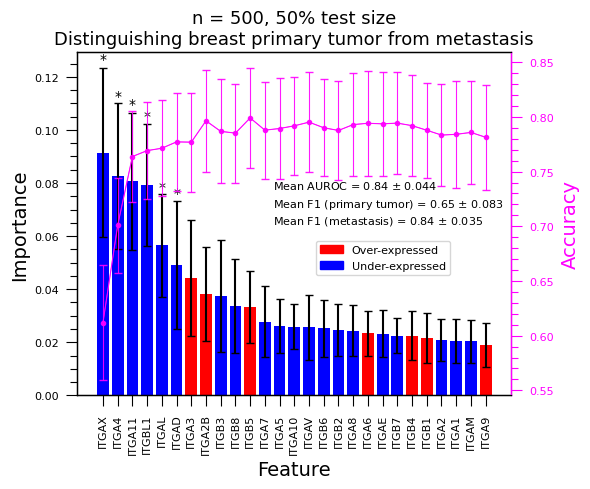

In [123]:
%%time
label_canc='Distinguishing breast primary tumor from metastasis'
#class weight balanced here
#DO NOT MAKE mistake on title label. be careful 
fig, ax = plt.subplots(1,1, figsize=(6, 5))
n=500
feature_importance=[]
accuracy=[]
test_size=0.50
auc_roc=[]
f1score_normal=[]
f1score_primtum=[]
y_test_total=[]
y_pred_total=[]
cum_acc_mean=[]
cum_acc_std=[]
cum_acc_itg=[]
feature_importances={"feature": [],"importance": []}
#first calculate the feature importance and accuracy etc.
for iteration in range(n):
    X = temp_aur_bcm_df.loc[temp_aur_bcm_df.index.str.contains('ITG')].T
    y = temp_aur_bcm_df.loc['sample_cat']
    #scaler = StandardScaler()
    #X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
    ### Random Forest Classifier ###
    classifier = RandomForestClassifier(n_estimators=100, random_state=42,
                                        class_weight= 'balanced')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    y_test_total=y_test_total+list(y_test)
    y_pred_total=y_pred_total+list(y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    f1score_normal.append(f1_score(y_test,y_pred,pos_label = 'Primary tumor'))
    f1score_primtum.append(f1_score(y_test,y_pred,pos_label = 'Metastatic tumor'))    
    auc_roc.append(roc_auc_score(y_test,classifier.predict_proba(X_test)[:,1]))
    for i,j in zip(X.columns,classifier.feature_importances_):
        feature_importances['feature'].append(i) 
        feature_importances['importance'].append(j)
    del X_train, X_test, y_train, y_test 
#now plotting
#pd.DataFrame(accuracy,columns=['accuracy']).plot(kind='hist',edgecolor='black',ax=ax[0],legend=False)
# ax[0].set_title(f"n= {n}",fontsize=25)
# #ax[0].legend(fontsize=8)
# plt.setp(ax[0].get_xticklabels(),fontsize=12)
# plt.setp(ax[0].get_yticklabels(),fontsize=12)
# ax[0].set_ylabel('Frequency',fontsize=25)

feature_importance_df=pd.DataFrame(feature_importances).set_index('feature')
feature_importance_df = feature_importance_df.sort_values(by='importance')

# for i in ['top', 'left', 'right', 'bottom']:
#     ax[0].spines[i].set_linewidth(1)

# ax[0].minorticks_on()
# ax[0].tick_params(axis='both', which='major', labelsize=12, width = 0.8, size = 8,pad=5)
# ax[0].tick_params(axis='both', which='minor', width = 0.8, size = 5)   
# ax[0].set_xlabel('Accuracy',fontsize=25)


#feature_importance_df_mean=feature_importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False)

#feature_importance_df_err=feature_importance_df.groupby('feature').std().loc[feature_importance_df_mean.index]


feature_importance_df_mean=feature_importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False)
feature_importance_df_mean=pd.concat([feature_importance_df_mean,itg_expr_df],axis=1)
feature_importance_df_err=feature_importance_df.groupby('feature').std().loc[feature_importance_df_mean.index]
colors = feature_importance_df_mean.groupby('relative_expression')['bar_color'].apply(lambda x: list(x.unique())[0]).to_dict()

#now calculate cumulatve feature vs accuracy
for cum_gene in range(1,feature_importance_df_mean.shape[0]+1):
    cum_individual_accuracy = []
    for iteration in range(n):
        X = temp_aur_bcm_df.loc[feature_importance_df_mean.index[0:cum_gene]].T
        y = temp_aur_bcm_df.loc['sample_cat']
        #scaler = StandardScaler()
        #X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
        ### Random Forest Classifier ###
        classifier = RandomForestClassifier(n_estimators=100, random_state=42,
                                            class_weight= 'balanced')
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        cum_individual_accuracy.append(accuracy_score(y_test,y_pred))
        del X_train, X_test, y_train, y_test
    cum_acc_itg.append(temp_aur_bcm_df.loc[feature_importance_df_mean.index[cum_gene-1]].name)
    cum_acc_mean.append(np.mean(np.array(cum_individual_accuracy)))
    cum_acc_std.append(np.std(np.array(cum_individual_accuracy)))

#first plot the barplot
bars=ax.bar(feature_importance_df_mean.index,
    feature_importance_df_mean['importance'],
                                yerr=feature_importance_df_err['importance'].values,
                                capsize=3,
                                    color=feature_importance_df_mean.bar_color)
for bar,integrin in zip(bars.patches,feature_importance_df_mean.index):
    if feature_importance_df_mean.loc[integrin]['adj_significant_bonf']=='yes':
        ax.annotate('*',
                   (bar.get_x() + bar.get_width()/2,
                    bar.get_height()+float(format(feature_importance_df_err.loc[integrin]['importance'],'0.3f'))), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')

ax2 = ax.twinx()
#plot the cum accuracy feature
ax2.errorbar(cum_acc_itg, cum_acc_mean,
            yerr=cum_acc_std,capsize=3,color='magenta', alpha=0.9, lw=0.8)
ax2.plot(cum_acc_itg, cum_acc_mean, '-o',markersize=3,
         color='magenta', lw=0.5, alpha=0.9)
ax2.set_ylabel('Accuracy', fontsize=14,labelpad=5, color='magenta')


ax.set_title(f"n = {n}, {int(test_size*100)}% test size\n{label_canc}",fontsize=13)

plt.setp(ax.get_xticklabels(),fontsize=8,rotation=90)
plt.setp(ax2.get_yticklabels(),fontsize=8)
ax.set_xlabel('Feature',fontsize=14)
ax.set_ylabel('Importance',fontsize=14,color='black')
#ax.legend(feature_importance_df_mean.relative_expression.unique(),fontsize=17)
handles = [mpatches.Patch(color=colors[i]) for i in colors]
labels = ['Over-expressed' if i=='high' else 'Under-expressed' for i in colors ]
ax.legend(handles, labels,fontsize=8,loc=(0.55,0.35))


for i in ['top', 'left', 'bottom']:
    ax.spines[i].set_linewidth(1)

ax2.spines['right'].set_color('magenta')    
ax2.spines['right'].set_linewidth(1)    
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=8, width = 0.8, size = 8,pad=5)
ax.tick_params(axis='y', which='minor', width = 0.8, size = 5)    

ax2.minorticks_on()
ax2.tick_params(axis='both', which='major', labelsize=8, width = 0.8, size = 8,pad=5,colors='magenta')
ax2.tick_params(axis='y', which='minor', width = 0.8, size = 5,colors='magenta')    
ax2.xaxis.set_minor_locator(tck.NullLocator())

# ax.text(0.6,
#            0.45,f'Mean accuracy = {format(np.mean(np.array(accuracy)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(accuracy)),"0.3f")}',
#            transform=ax.transAxes,fontsize=8)
ax.text(0.45,
           0.6,f'Mean AUROC = {format(np.mean(np.array(auc_roc)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(auc_roc)),"0.3f")}',
           transform=ax.transAxes,fontsize=8)
ax.text(0.45,
           0.55,f'Mean F1 (primary tumor) = {format(np.mean(np.array(f1score_normal)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(f1score_normal)),"0.3f")}',
           transform=ax.transAxes,fontsize=8)
ax.text(0.45,
           0.5,f'Mean F1 (metastasis) = {format(np.mean(np.array(f1score_primtum)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(f1score_primtum)),"0.3f")}',
           transform=ax.transAxes,fontsize=8)
#ConfusionMatrixDisplay.from_predictions(y_test_total, y_pred_total,normalize='true')


#ax[0].remove()
plt.tight_layout()

#plt.savefig(f'figures/RF_PAM50_ITGA7_class-weight_bal.png', dpi = 1000, bbox_inches='tight')
del  feature_importance, feature_importance_df, feature_importance_df_mean, feature_importance_df_err



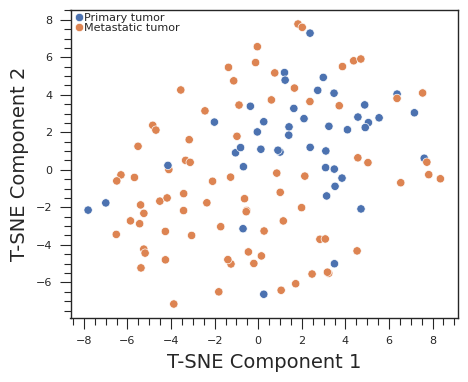

In [159]:
fig, ax = plt.subplots(1,1, figsize=(5, 4))

data = temp_aur_bcm_df.loc[temp_aur_bcm_df.index.str.contains('ITG')].T
feat = temp_aur_bcm_df.loc['sample_cat']
tsne = TSNE(n_components=2, learning_rate='auto', random_state=42)
z = tsne.fit_transform(data)

# import colorcet as cc
# fig, ax = plt.subplots(1,1, figsize=(10, 8))

# pallete = sns.color_palette(cc.glasbey, n_colors=8)

sns.scatterplot(x =  z[:,0], y = z[:,1], hue = feat)

ax.legend( fontsize=8,loc='upper left',frameon=False,
          borderpad = 0.03, handletextpad = 0.005, 
          labelspacing = 0.05, handlelength  = 1, borderaxespad = 0.2)#.get_title().set_fontsize(9)
ax.set_ylabel('T-SNE Component 2', fontsize=14, labelpad=5)
ax.set_xlabel('T-SNE Component 1', fontsize=14, labelpad = 5)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=8, width = 0.8, size = 8,pad=5)
ax.tick_params(axis='both', which='minor', width = 0.8, size = 5)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1)
    
#plt.savefig('figures/tcga_pan_tsne.jpg', dpi = 1000, bbox_inches='tight')
del data, feat
plt.show()



In [23]:
itg_temp_aur_bcm_df

,AUR-AFEA-TTP1-A-1-0-R-A741-41,AUR-AFEA-TTM4-A-1-1-R-A742-41,AUR-AFEA-TTM2-A-1-1-R-A742-41,AUR-AFEA-TTM1-A-1-1-R-A742-41,AUR-AFEA-TTM3-A-1-1-R-A742-41,AUR-AFEA-TTM6-A-1-0-R-A741-41,AUR-AFE7-TTP2-A-1-1-R-A742-41,AUR-AFE7-TTM2-A-1-1-R-A742-41,AUR-AFE7-TTM1-A-1-1-R-A742-41,AUR-AFE7-TTM3-A-1-1-R-A742-41,...,AUR-AD9H-TTM1-A-2-1-R-A542-39,AUR-AD9E-TTM4-A-1-1-R-A542-39,AUR-AD9E-TTM2-A-1-1-R-A542-39,AUR-AFUK-TTM1-A-1-0-R-A743-41,AUR-AD9H-TTM3-A-1-1-R-A542-39,AUR-AD9H-TTM2-A-1-1-R-A542-39,AUR-AD9F-TTM3-A-1-1-R-A542-39,AUR-AD9F-TTM1-A-1-1-R-A542-39,AUR-AD9F-TTM2-A-1-1-R-A542-39,AUR-AFUG-TTM1-A-1-1-R-A743-41
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ITGA10,9.042163,9.058264,10.066458,10.31353,10.100056,8.985996,10.118316,9.676966,10.214833,9.234469,...,9.625823,7.732702,8.028988,5.838074,7.179643,7.755967,8.776688,8.890847,8.456701,8.425357
ITGB6,10.12697,11.540429,11.569799,11.859223,12.131739,11.786744,10.371864,10.27312,9.57601,8.770896,...,5.011227,6.704182,9.516603,8.064197,8.848064,7.741008,9.746162,11.85204,10.837845,11.58349
ITGA6,12.354065,12.901162,13.543532,13.347392,13.153614,12.764451,15.72765,17.23652,16.51524,15.699356,...,13.137122,12.626468,12.337788,12.122653,11.744745,11.485181,12.572149,12.85514,13.092984,12.903908
ITGA4,11.313245,9.471967,9.988855,9.285913,10.611934,12.727867,10.090326,10.396719,9.884466,9.240648,...,7.673309,8.501617,9.075709,11.722744,7.764987,6.883338,8.607176,8.670399,11.499138,11.9751
ITGAV,12.640647,13.028463,14.282213,13.451376,13.969347,13.227486,14.433413,15.477171,14.80075,13.898188,...,12.499364,12.040483,12.302638,13.618474,11.93467,11.947085,13.427622,13.555437,13.448019,14.590677
ITGA9,11.58792,11.13298,10.561817,11.803337,11.469579,11.654677,12.059868,12.300939,11.891313,11.431236,...,9.427314,10.786551,10.550577,9.385624,9.556161,8.744264,12.007052,10.695208,11.875802,11.136877
ITGB5,11.198523,11.919809,11.909761,12.693756,11.857207,10.324696,12.846703,13.439886,12.542287,11.809658,...,11.513171,12.165784,12.471627,12.7342,12.863606,13.730693,12.475188,13.380947,12.797366,14.088758
ITGA1,13.388093,12.23614,11.499163,10.708658,12.966045,13.221693,12.713831,12.644359,11.938906,11.760282,...,11.305878,12.539817,12.849973,11.736963,11.662223,9.720803,13.266152,12.858207,12.907301,12.729747
ITGA2,11.137547,10.914379,11.701941,10.131587,12.387209,11.918825,12.717717,12.555148,12.233563,12.085991,...,9.874213,10.032694,10.571885,11.293078,11.700443,11.403502,11.610357,11.763607,11.245455,12.54291


In [24]:
#melt dataframe for split violin plot
j=0
for integrin in itg_expr.index:
    if j==0:
        itg_vp_df = pd.DataFrame(zip(np.repeat(integrin,
                                               itg_temp_aur_bcm_df.loc[integrin].values.shape[0]),
                                     itg_temp_aur_bcm_df.loc[integrin].values,
                                    itg_temp_aur_bcm_df.loc[integrin].index.to_list()),
                                 columns=['integrin','expression','sample_id']).copy()
    else:
        temp_df = pd.DataFrame(zip(np.repeat(integrin,
                                               itg_temp_aur_bcm_df.loc[integrin].values.shape[0]),
                                     itg_temp_aur_bcm_df.loc[integrin].values,
                                  itg_temp_aur_bcm_df.loc[integrin].index.to_list()),
                                 columns=['integrin','expression','sample_id']).copy()
        itg_vp_df = pd.concat([itg_vp_df,temp_df]).copy()
        del temp_df
    j+=1
    
itg_vp_df['sample_cat'] = [itg_temp_aur_bcm_df[sampid].loc['sample_cat'] for sampid in itg_vp_df['sample_id'].values]
itg_vp_df['sample_loc'] = [itg_temp_aur_bcm_df[sampid].loc['sample_loc'] for sampid in itg_vp_df['sample_id'].values]

itg_vp_df['primtum_mean']=[itg_expr_df.loc[intgr]['primtum_mean'] for intgr in itg_vp_df.integrin.values]
itg_vp_df['met_mean']=[itg_expr_df.loc[intgr]['met_mean'] for intgr in itg_vp_df.integrin.values]
itg_vp_df['met_primtum_diff']=[itg_expr_df.loc[intgr]['met_mean']-itg_expr_df.loc[intgr]['primtum_mean'] for intgr in itg_vp_df.integrin.values]
itg_vp_df['adj_significant_bonf']=[itg_expr_df.loc[intgr]['adj_significant_bonf'] for intgr in itg_vp_df.integrin.values]

#sort by relative expression
itg_vp_df = itg_vp_df.sort_values(by='met_primtum_diff',key=abs).copy()
itg_vp_df

,integrin,expression,sample_id,sample_cat,sample_loc,primtum_mean,met_mean,met_primtum_diff,adj_significant_bonf
22,ITGA10,10.578319,AUR-AFSP-TTP1-A-8-0-R-A741-41,Primary tumor,Breast,8.979390,8.944938,-0.034452,no
23,ITGA10,9.704481,AUR-AFSP-TTM1-A-8-0-R-A741-41,Metastatic tumor,Pleura,8.979390,8.944938,-0.034452,no
24,ITGA10,10.223519,AUR-AF9A-TTP1-A-1-0-R-A741-41,Primary tumor,Breast,8.979390,8.944938,-0.034452,no
57,ITGA10,7.911995,AUR-AERX-TTP1-A-1-0-R-A741-41,Primary tumor,Breast,8.979390,8.944938,-0.034452,no
58,ITGA10,6.244861,AUR-AERX-TTM1-A-1-1-R-A742-41,Metastatic tumor,Liver,8.979390,8.944938,-0.034452,no
...,...,...,...,...,...,...,...,...,...
73,ITGBL1,12.475631,AUR-AFUN-TTP1-A-1-0-R-A741-41,Primary tumor,Breast,11.387463,9.774872,-1.612590,yes
74,ITGBL1,7.298430,AUR-AFUN-TTM1-A-1-0-R-A743-41,Metastatic tumor,Uterus,11.387463,9.774872,-1.612590,yes
75,ITGBL1,11.847942,AUR-AFUL-TTP1-A-1-1-R-A743-41,Primary tumor,Breast,11.387463,9.774872,-1.612590,yes
60,ITGBL1,10.020464,AUR-AERW-TTM1-A-1-1-R-A742-41,Metastatic tumor,Skin,11.387463,9.774872,-1.612590,yes


In [26]:
#itg_vp_df[itg_vp_df.adj_significant_bonf=='yes'].integrin.unique()


sorted by abs value of mean difference, PAY ATTENTION to asterisk *


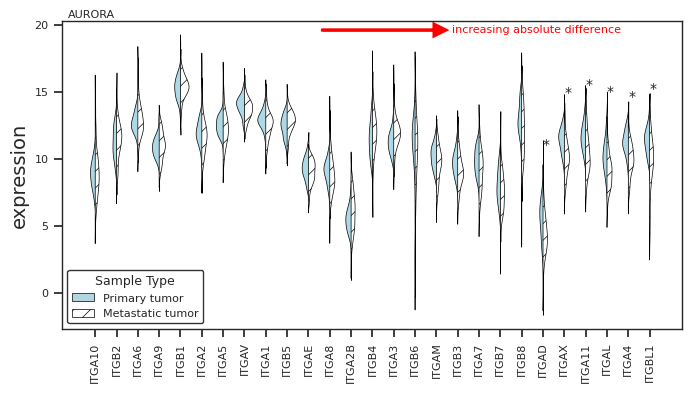

In [29]:
print('sorted by abs value of mean difference, PAY ATTENTION to asterisk *')
fig, ax = plt.subplots(figsize=(8,4))

sns.set(style="ticks", color_codes=True)
sns.violinplot(data=itg_vp_df,
                          x="integrin",y="expression",hue='sample_cat',ax=ax,split=True,inner=None,linewidth=0.5,
                         palette=sns.color_palette(palette=['lightblue','white']))

for i, violin in enumerate(ax.findobj(mpl.collections.PolyCollection)):
    if i % 2:
        violin.set_hatch("//")
        violin.set_facecolor("white")
        violin.set_edgecolor("black")
        violin.set_alpha(1)
    else:
        violin.set_facecolor("lightblue")
        violin.set_edgecolor("black")
        violin.set_alpha(1)

mpl.rcParams['hatch.linewidth'] = 0.5


for integrin_sig in itg_vp_df[itg_vp_df.adj_significant_bonf=='yes'].integrin.unique():
    ax.text(integrin_sig,itg_vp_df[itg_vp_df.integrin==integrin_sig].expression.max()+1,'*',fontsize=10)

ax.arrow(0.42, 0.97, 0.2, 0,transform=ax.transAxes, head_width=0.04, head_length=0.02, linewidth=2, color='red', length_includes_head=True)
ax.text(0.63,0.96,'increasing absolute difference',color='red',
               transform=ax.transAxes,fontsize=8)

#ax.arrow(0.1, 0.97, -0.1, 0,transform=ax.transAxes, head_width=0.04, head_length=0.02, linewidth=2, color='blue', length_includes_head=True)
#ax.text(0.15,0.96,'smaller absolute differences',color='blue',transform=ax.transAxes,fontsize=8)


ax.text(0.01,1.01,'AURORA',
               transform=ax.transAxes,fontsize=8)

ax.legend( fontsize=8,title='Sample Type',loc='lower left',
                title_fontsize=9, edgecolor='black')

#format legends
ax.legend_.findobj(mpl.patches.Rectangle)[0].set_edgecolor("black")
ax.legend_.findobj(mpl.patches.Rectangle)[0].set_alpha(1)


ax.legend_.findobj(mpl.patches.Rectangle)[1].set_hatch("//")  
ax.legend_.findobj(mpl.patches.Rectangle)[1].set_edgecolor("black")
ax.legend_.findobj(mpl.patches.Rectangle)[1].set_alpha(1)

plt.setp(ax.get_xticklabels(),fontsize=8,rotation=90)
ax.tick_params(axis='y', labelsize=8)      

ax.set_ylabel('expression',fontsize=14)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1)
x_axis = ax.axes.get_xaxis()        
x_label = x_axis.get_label()
##print isinstance(x_label, matplotlib.artist.Artist)
x_label.set_visible(False)

#plt.savefig(f'AURORA_figures/vp_primary_metastatic_sample_mean_integrin_expression.png',
#            dpi = 1000, bbox_inches='tight')


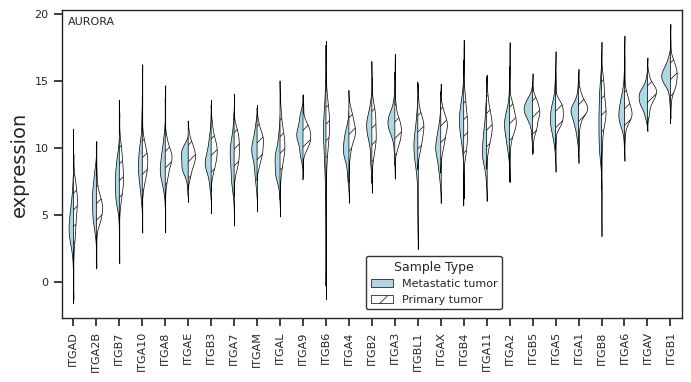

In [39]:
fig, ax = plt.subplots(figsize=(8,4))

sns.set(style="ticks", color_codes=True)
sns.violinplot(data=itg_vp_df,
                          x="integrin",y="expression",hue='sample_cat',ax=ax,split=True,inner=None,linewidth=0.5,
                         palette=sns.color_palette(palette=['lightblue','white']))

for i, violin in enumerate(ax.findobj(mpl.collections.PolyCollection)):
    if i % 2:
        violin.set_hatch("//")
        violin.set_facecolor("white")
        violin.set_edgecolor("black")
        violin.set_alpha(1)
    else:
        violin.set_facecolor("lightblue")
        violin.set_edgecolor("black")
        violin.set_alpha(1)

mpl.rcParams['hatch.linewidth'] = 0.5

ax.text(0.01,0.95,'AURORA',
               transform=ax.transAxes,fontsize=8)
ax.legend( fontsize=8,title='Sample Type',loc='lower center',bbox_to_anchor=(0.6,0.01),
                title_fontsize=9, edgecolor='black')

#format legends
ax.legend_.findobj(mpl.patches.Rectangle)[0].set_edgecolor("black")
ax.legend_.findobj(mpl.patches.Rectangle)[0].set_alpha(1)


ax.legend_.findobj(mpl.patches.Rectangle)[1].set_hatch("//")  
ax.legend_.findobj(mpl.patches.Rectangle)[1].set_edgecolor("black")
ax.legend_.findobj(mpl.patches.Rectangle)[1].set_alpha(1)

plt.setp(ax.get_xticklabels(),fontsize=8,rotation=90)
ax.tick_params(axis='y', labelsize=8)      

ax.set_ylabel('expression',fontsize=14)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1)
x_axis = ax.axes.get_xaxis()        
x_label = x_axis.get_label()
##print isinstance(x_label, matplotlib.artist.Artist)
x_label.set_visible(False)

#plt.savefig(f'AURORA_figures/vp_primary_metastatic_sample_mean_integrin_expression.png',
#            dpi = 1000, bbox_inches='tight')


Mean F1 (primary tumor) = 0.65 $\pm$ 0.084
Mean F1 (metastasis) = 0.84 $\pm$ 0.035
random forest plot:  n = 500, 50% test size
Distinguishing breast primary tumor from metastasis
CPU times: user 15min 42s, sys: 3.78 s, total: 15min 46s
Wall time: 14min 48s


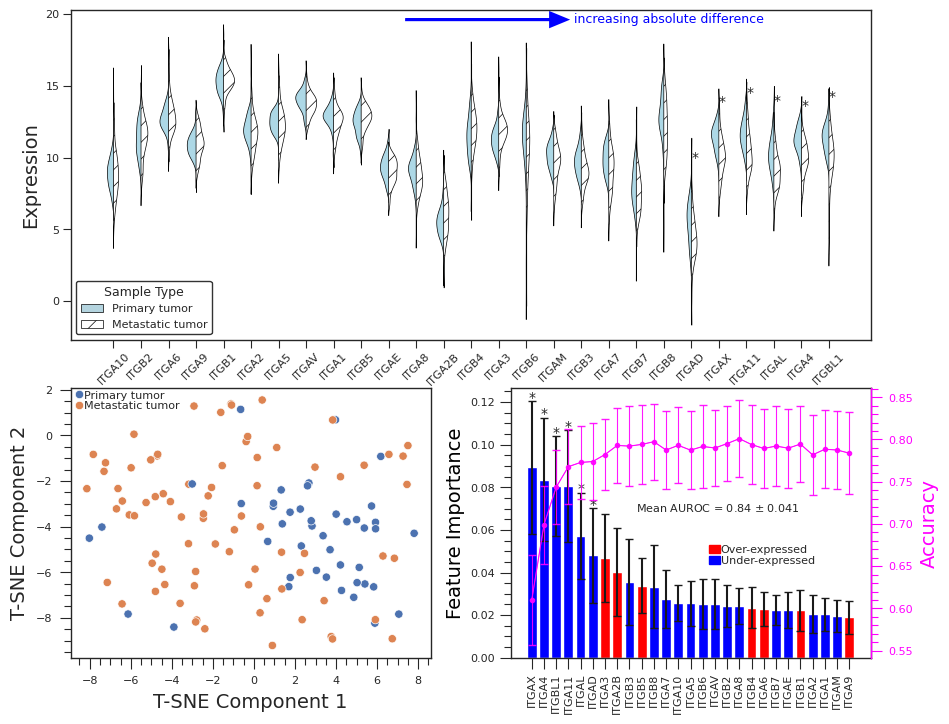

In [30]:
%%time
#FIRST set up axes

left, width = 0, 1
bottom, height = 0, 1
bottom_h = left_h = left+(0.5*width)
rect_topfigure = [left, 0.53*height, width, 0.55*height] 
rect_bottomleft = [left, bottom, 0.9*left_h, 0.45*height] 
rect_bottomright = [(0.9*left_h)+((width-(2*0.9*left_h))), bottom, 0.9*left_h, 0.45*height] 


# Set up the size of the figure
fig = plt.figure(figsize=(8,6))


axTopfigure = plt.axes(rect_topfigure)
axBottomleft = plt.axes(rect_bottomleft) 
axBottomright = plt.axes(rect_bottomright) 


# Make the three plots
#FIRST VIOLIN plot
sns.set(style="ticks", color_codes=True)
sns.violinplot(data=itg_vp_df,
                          x="integrin",y="expression",hue='sample_cat',ax=axTopfigure,split=True,inner=None,linewidth=0.5,
                         palette=sns.color_palette(palette=['lightblue','white']))

for integrin_sig in itg_vp_df[itg_vp_df.adj_significant_bonf=='yes'].integrin.unique():
    axTopfigure.text(integrin_sig,itg_vp_df[itg_vp_df.integrin==integrin_sig].expression.max(),'*',fontsize=10)

axTopfigure.arrow(0.42, 0.97, 0.2, 0,transform=axTopfigure.transAxes, head_width=0.04,
                  head_length=0.02, linewidth=2, color='blue', length_includes_head=True)
axTopfigure.text(0.63,0.96,'increasing absolute difference',color='blue',
               transform=axTopfigure.transAxes,fontsize=9)


for i, violin in enumerate(axTopfigure.findobj(mpl.collections.PolyCollection)):
    if i % 2:
        violin.set_hatch("//")
        violin.set_facecolor("white")
        violin.set_edgecolor("black")
        violin.set_alpha(1)
    else:
        violin.set_facecolor("lightblue")
        violin.set_edgecolor("black")
        violin.set_alpha(1)

mpl.rcParams['hatch.linewidth'] = 0.5

#axTopfigure.text(0.45,1.03,'AURORA',
#               transform=axTopfigure.transAxes,fontsize=15)
axTopfigure.legend(fontsize=8,title='Sample Type',loc='lower left',
                title_fontsize=9, edgecolor='black')

#format legends
axTopfigure.legend_.findobj(mpl.patches.Rectangle)[0].set_edgecolor("black")
axTopfigure.legend_.findobj(mpl.patches.Rectangle)[0].set_alpha(1)


axTopfigure.legend_.findobj(mpl.patches.Rectangle)[1].set_hatch("//")  
axTopfigure.legend_.findobj(mpl.patches.Rectangle)[1].set_edgecolor("black")
axTopfigure.legend_.findobj(mpl.patches.Rectangle)[1].set_alpha(1)

plt.setp(axTopfigure.get_xticklabels(),fontsize=8,rotation=90)
axTopfigure.tick_params(axis='y', labelsize=8,pad=2,width=0.8)      
axTopfigure.tick_params(axis='x', labelsize=8,pad=2,width=0.8,rotation=45)      

axTopfigure.set_ylabel('Expression',fontsize=14)
for i in ['top', 'left', 'right', 'bottom']:
    axTopfigure.spines[i].set_linewidth(1)
x_axis = axTopfigure.axes.get_xaxis()        
x_label = x_axis.get_label()
##print isinstance(x_label, matplotlib.artist.Artist)
x_label.set_visible(False)

#second cluster plot

data = temp_aur_bcm_df.loc[temp_aur_bcm_df.index.str.contains('ITG')].T
feat = temp_aur_bcm_df.loc['sample_cat']
tsne = TSNE(n_components=2, learning_rate='auto', random_state=42)
z = tsne.fit_transform(data)


sns.scatterplot(x =  z[:,0], y = z[:,1], hue = feat, ax = axBottomleft)

axBottomleft.legend( fontsize=8,loc='upper left',frameon=False,
          borderpad = 0.03, handletextpad = 0.005, 
          labelspacing = 0.05, handlelength  = 1, borderaxespad = 0.2)#.get_title().set_fontsize(9)
axBottomleft.set_ylabel('T-SNE Component 2', fontsize=14, labelpad=5)
axBottomleft.set_xlabel('T-SNE Component 1', fontsize=14, labelpad = 5)

axBottomleft.minorticks_on()
axBottomleft.tick_params(axis='both', which='major', labelsize=8, width = 0.8, size = 8,pad=5)
axBottomleft.tick_params(axis='both', which='minor', width = 0.8, size = 5)

for i in ['top', 'left', 'right', 'bottom']:
    axBottomleft.spines[i].set_linewidth(1)
    

del data, feat

#NoW the random forest plot

label_canc='Distinguishing breast primary tumor from metastasis'
#class weight balanced here
#DO NOT MAKE mistake on title label. be careful 

n=500
feature_importance=[]
accuracy=[]
test_size=0.50
auc_roc=[]
f1score_normal=[]
f1score_primtum=[]
y_test_total=[]
y_pred_total=[]
cum_acc_mean=[]
cum_acc_std=[]
cum_acc_itg=[]
feature_importances={"feature": [],"importance": []}
#first calculate the feature importance and accuracy etc.
for iteration in range(n):
    X = temp_aur_bcm_df.loc[temp_aur_bcm_df.index.str.contains('ITG')].T
    y = temp_aur_bcm_df.loc['sample_cat']
    #scaler = StandardScaler()
    #X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
    ### Random Forest Classifier ###
    classifier = RandomForestClassifier(n_estimators=100, random_state=42,
                                        class_weight= 'balanced')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    y_test_total=y_test_total+list(y_test)
    y_pred_total=y_pred_total+list(y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    f1score_normal.append(f1_score(y_test,y_pred,pos_label = 'Primary tumor'))
    f1score_primtum.append(f1_score(y_test,y_pred,pos_label = 'Metastatic tumor'))    
    auc_roc.append(roc_auc_score(y_test,classifier.predict_proba(X_test)[:,1]))
    for i,j in zip(X.columns,classifier.feature_importances_):
        feature_importances['feature'].append(i) 
        feature_importances['importance'].append(j)
    del X_train, X_test, y_train, y_test 

feature_importance_df=pd.DataFrame(feature_importances).set_index('feature')
feature_importance_df = feature_importance_df.sort_values(by='importance')


feature_importance_df_mean=feature_importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False)
feature_importance_df_mean=pd.concat([feature_importance_df_mean,itg_expr_df],axis=1)
feature_importance_df_err=feature_importance_df.groupby('feature').std().loc[feature_importance_df_mean.index]
colors = feature_importance_df_mean.groupby('relative_expression')['bar_color'].apply(lambda x: list(x.unique())[0]).to_dict()

#now calculate cumulatve feature vs accuracy
for cum_gene in range(1,feature_importance_df_mean.shape[0]+1):
    cum_individual_accuracy = []
    for iteration in range(n):
        X = temp_aur_bcm_df.loc[feature_importance_df_mean.index[0:cum_gene]].T
        y = temp_aur_bcm_df.loc['sample_cat']
        #scaler = StandardScaler()
        #X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
        ### Random Forest Classifier ###
        classifier = RandomForestClassifier(n_estimators=100, random_state=42,
                                            class_weight= 'balanced')
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        cum_individual_accuracy.append(accuracy_score(y_test,y_pred))
        del X_train, X_test, y_train, y_test
    cum_acc_itg.append(temp_aur_bcm_df.loc[feature_importance_df_mean.index[cum_gene-1]].name)
    cum_acc_mean.append(np.mean(np.array(cum_individual_accuracy)))
    cum_acc_std.append(np.std(np.array(cum_individual_accuracy)))

#first plot the barplot
bars=axBottomright.bar(feature_importance_df_mean.index,
    feature_importance_df_mean['importance'],
                                yerr=feature_importance_df_err['importance'].values,
                                capsize=3,
                                    color=feature_importance_df_mean.bar_color)
for bar,integrin in zip(bars.patches,feature_importance_df_mean.index):
    if feature_importance_df_mean.loc[integrin]['adj_significant_bonf']=='yes':
        axBottomright.annotate('*',
                   (bar.get_x() + bar.get_width()/2,
                    bar.get_height()+float(format(feature_importance_df_err.loc[integrin]['importance'],'0.3f'))), ha='center', va='center',
                   size=10, xytext=(0, 3),
                   textcoords='offset points')

#axBottomright.set_xlabel('Feature',fontsize=14)
axBottomright.set_ylabel('Feature Importance',fontsize=14,color='black')

#twinx draws all four spines 
for i in ['top', 'left', 'bottom','right']:
    axBottomright.spines[i].set_linewidth(1)

handles = [mpatches.Patch(color=colors[i]) for i in colors]
labels = ['Over-expressed' if i=='high' else 'Under-expressed' for i in colors ]

axBottomright.legend(handles, labels,fontsize=8,loc=(0.55,0.34),frameon=False,
          borderpad = 0.03, handletextpad = 0.05, 
          labelspacing = 0.05, handlelength  = 1, borderaxespad = 0.2)

axBottomright.minorticks_on()
axBottomright.tick_params(axis='both', which='major', labelsize=8, width = 0.8, size = 8,pad=3)
axBottomright.tick_params(axis='y', which='minor', width = 0.8, size = 5)    
plt.setp(axBottomright.get_xticklabels(),fontsize=8,rotation=90)


# axBottomright.text(0.6,
#            0.45,f'Mean accuracy = {format(np.mean(np.array(accuracy)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(accuracy)),"0.3f")}',
#            transform=axBottomright.transAxes,fontsize=8)
axBottomright.text(0.35,
           0.54,f'Mean AUROC = {format(np.mean(np.array(auc_roc)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(auc_roc)),"0.3f")}',
           transform=axBottomright.transAxes,fontsize=8)
# axBottomright.text(0.35,
#            0.49,f'Mean F1 (primary tumor) = {format(np.mean(np.array(f1score_normal)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(f1score_normal)),"0.3f")}',
#            transform=axBottomright.transAxes,fontsize=8)
print(f'Mean F1 (primary tumor) = {format(np.mean(np.array(f1score_normal)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(f1score_normal)),"0.3f")}')
# axBottomright.text(0.35,
#            0.44,f'Mean F1 (metastasis) = {format(np.mean(np.array(f1score_primtum)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(f1score_primtum)),"0.3f")}',
#            transform=axBottomright.transAxes,fontsize=8)
print(f'Mean F1 (metastasis) = {format(np.mean(np.array(f1score_primtum)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(f1score_primtum)),"0.3f")}')
#twinx draws all four spines REMEMBER
ax2 = axBottomright.twinx()
#plot the cum accuracy feature
ax2.errorbar(cum_acc_itg, cum_acc_mean,
            yerr=cum_acc_std,capsize=3,color='magenta', alpha=0.9, lw=0.8)
ax2.plot(cum_acc_itg, cum_acc_mean, '-o',markersize=3,
         color='magenta', lw=0.5, alpha=0.9)
ax2.set_ylabel('Accuracy', fontsize=14,labelpad=5, color='magenta')


#axBottomright.set_title(f"n = {n}, {int(test_size*100)}% test size\n{label_canc}",fontsize=13)
print('random forest plot: ',f"n = {n}, {int(test_size*100)}% test size\n{label_canc}")

plt.setp(ax2.get_yticklabels(),fontsize=8)    

for i in ['top', 'left', 'bottom']:
    ax2.spines[i].set_visible(False)

ax2.spines['right'].set_color('magenta')    
ax2.spines['right'].set_linewidth(1)    
    

ax2.minorticks_on()
ax2.tick_params(axis='y', which='major', labelsize=8, width = 0.8, size = 8,pad=5,colors='magenta')
ax2.tick_params(axis='y', which='minor', width = 0.8, size = 5,colors='magenta')    

axBottomright.xaxis.set_minor_locator(tck.NullLocator())

del  feature_importance, feature_importance_df, feature_importance_df_mean, feature_importance_df_err, handles, labels

plt.savefig(f'AURORA_figures/AURORA_metastasis_tsne_violinplot_all_metastasis_sites.png', dpi = 1000, bbox_inches='tight')


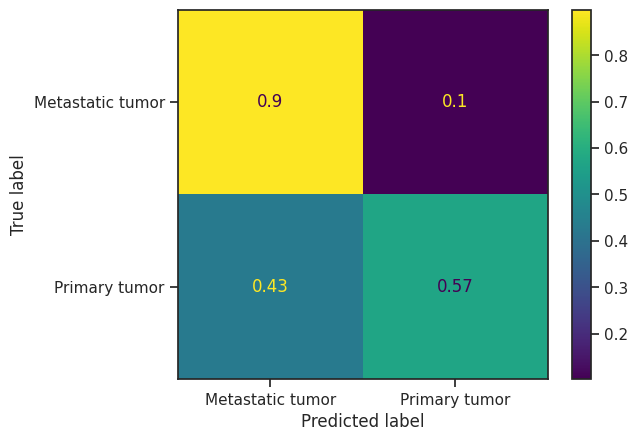

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test_total, y_pred_total,normalize='true')

In [25]:
# NOTE: i changed ORC6L to ORC6

PAM50_geneset = ['ACTR3B', 'ANLN', 'BAG1','BCL2', 'BIRC5', 'BLVRA', 'CCNB1', 
                 'CCNE1', 'CDC20', 'CDC6', 'CDH3', 'CENPF', 'CEP55', 'CXXC5', 
                 'EGFR', 'ERBB2', 'ESR1', 'EXO1', 'FGFR4', 'FOXA1', 'FOXC1', 
                 'GPR160', 'GRB7', 'KIF2C', 'KRT14', 'KRT17', 'KRT5', 'MAPT',
                 'MDM2', 'MELK', 'MIA', 'MKI67', 'MLPH', 'MMP11', 'MYBL2', 'MYC',
                 'NAT1', 'NDC80', 'NUF2', 'ORC6', 'PGR', 'PHGDH', 'PTTG1',
                 'RRM2', 'SFRP1', 'SLC39A6', 'TMEM45B', 'TYMS', 'UBE2C', 'UBE2T']

#remove AC010422.5

donato_ctc_32genesig= ['TMEM125','VPS13D','POLR2J2','CCDC9',
'PGGT1B',
'SNAPC3','VEGFA',
'UBALD1',
'CLCN2','ZNF771',
'FAM13A',
'ABCC5','IKZF2',
'ZBTB43',
'IRS1',
'BIVM',
'PIK3C2B',
'LRIG2',
'MLLT3',
'PLD6',
'P4HA1',
'GDF15',
'LIPT1',
'MACC1',
'PPP1R3E',
'EPHX2',
'POFUT1',
'NIPAL1',
'CCNG2',
'HIF1A',
'CTSS']


In [26]:
pam50_expr_dict={'pam50_gene':[],'primtum_mean':[],'primtum_sem':[],'met_mean':[],
               'met_sem':[],
               'relative_expression':[],'p_value':[],'significant':[]}
p_value_cutoff=0.05
for pam50_gene in PAM50_geneset:
    pam50_expr_dict['pam50_gene'].append(pam50_gene)
    primtum_sample_expr=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[pam50_gene].mean()
    primtum_sample_sem=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[pam50_gene].sem()
    met_sample_expr=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Metastatic tumor'].loc[pam50_gene].mean()
    met_sample_sem=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Metastatic tumor'].loc[pam50_gene].sem()
    pam50_expr_dict['primtum_mean'].append(primtum_sample_expr)
    pam50_expr_dict['primtum_sem'].append(primtum_sample_sem)
    pam50_expr_dict['met_mean'].append(met_sample_expr)
    pam50_expr_dict['met_sem'].append(met_sample_sem)
    if (met_sample_expr - primtum_sample_expr)>0:
        pam50_expr_dict['relative_expression'].append('high')
    elif (met_sample_expr - primtum_sample_expr)<0:
        pam50_expr_dict['relative_expression'].append('low')
    else:
        pam50_expr_dict['relative_expression'].append('same')
    p_value_pam50_gene=stats.ttest_ind(a=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[pam50_gene].astype('float64').values,
                                                    b=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Metastatic tumor'].loc[pam50_gene].astype('float64').values).pvalue
    pam50_expr_dict['p_value'].append(p_value_pam50_gene) 
    if p_value_pam50_gene>=p_value_cutoff:
        pam50_expr_dict['significant'].append('no')
    else:
        pam50_expr_dict['significant'].append('yes')
        
pam50_gene_expr_df=pd.DataFrame(pam50_expr_dict).set_index('pam50_gene')
del pam50_expr_dict, primtum_sample_expr, primtum_sample_sem, met_sample_expr, met_sample_sem

pam50_gene_expr_df = pam50_gene_expr_df.sort_values(by='relative_expression')
pam50_gene_expr_df['bar_color']=['red' if expr=='high' else 'blue' if expr=='low' else 'green' for expr in pam50_gene_expr_df['relative_expression'].values]
pam50_gene_expr_df


,primtum_mean,primtum_sem,met_mean,met_sem,relative_expression,p_value,significant,bar_color
pam50_gene,,,,,,,,
UBE2T,8.648746,0.217819,9.402398,0.171638,high,0.008492,yes,red
MLPH,11.553587,0.353533,12.160460,0.293853,high,0.202963,no,red
MIA,5.820300,0.414576,5.988109,0.315994,high,0.749537,no,red
NDC80,9.005743,0.196592,9.343995,0.169042,high,0.212631,no,red
NUF2,8.852083,0.202819,9.099463,0.190014,high,0.405499,no,red
MAPT,10.054585,0.254342,10.092040,0.230031,high,0.917797,no,red
UBE2C,9.223930,0.240590,9.751132,0.190206,high,0.093447,no,red
KIF2C,9.508150,0.203696,10.022589,0.193104,high,0.089212,no,red
GRB7,9.811850,0.267237,10.334416,0.209733,high,0.132068,no,red


In [27]:
#now going to do multiple testing correction (careful must be run once after running previous cell)
pvals=pam50_gene_expr_df.p_value.values
#trying benjamin hochberg, calculuating p values and corresponding sig
pam50_gene_expr_df['adj_p_val_bh']=multi.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pam50_gene_expr_df['adj_significant_bh']=['yes' if p_value<p_value_cutoff else 'no' for p_value in pam50_gene_expr_df['adj_p_val_bh'].values ]
#trying , calculuating p values and corresponding sig
pam50_gene_expr_df['adj_p_val_bonf']=multi.multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)[1]
pam50_gene_expr_df['adj_significant_bonf']=['yes' if p_value<p_value_cutoff else 'no' for p_value in pam50_gene_expr_df['adj_p_val_bonf'].values ]
pam50_gene_expr_df


,primtum_mean,primtum_sem,met_mean,met_sem,relative_expression,p_value,significant,bar_color,adj_p_val_bh,adj_significant_bh,adj_p_val_bonf,adj_significant_bonf
pam50_gene,,,,,,,,,,,,
UBE2T,8.648746,0.217819,9.402398,0.171638,high,0.008492,yes,red,0.038598,yes,0.424577,no
MLPH,11.553587,0.353533,12.160460,0.293853,high,0.202963,no,red,0.375857,no,1.000000,no
MIA,5.820300,0.414576,5.988109,0.315994,high,0.749537,no,red,0.871554,no,1.000000,no
NDC80,9.005743,0.196592,9.343995,0.169042,high,0.212631,no,red,0.379698,no,1.000000,no
NUF2,8.852083,0.202819,9.099463,0.190014,high,0.405499,no,red,0.627286,no,1.000000,no
MAPT,10.054585,0.254342,10.092040,0.230031,high,0.917797,no,red,0.956039,no,1.000000,no
UBE2C,9.223930,0.240590,9.751132,0.190206,high,0.093447,no,red,0.194682,no,1.000000,no
KIF2C,9.508150,0.203696,10.022589,0.193104,high,0.089212,no,red,0.193939,no,1.000000,no
GRB7,9.811850,0.267237,10.334416,0.209733,high,0.132068,no,red,0.264137,no,1.000000,no


In [28]:
# #ONLY get metastatic samples, FROM lung,liver,brain, lymph node
# chosen_sites = ['Liver','Lymph node','Brain','Lung','Breast']
# met_temp_aur = temp_aur_bcm_df.loc[:,  temp_aur_bcm_df.loc['sample_loc'].isin(chosen_sites)].copy()
# del chosen_sites



CPU times: user 27min, sys: 6.41 s, total: 27min 7s
Wall time: 27min 13s


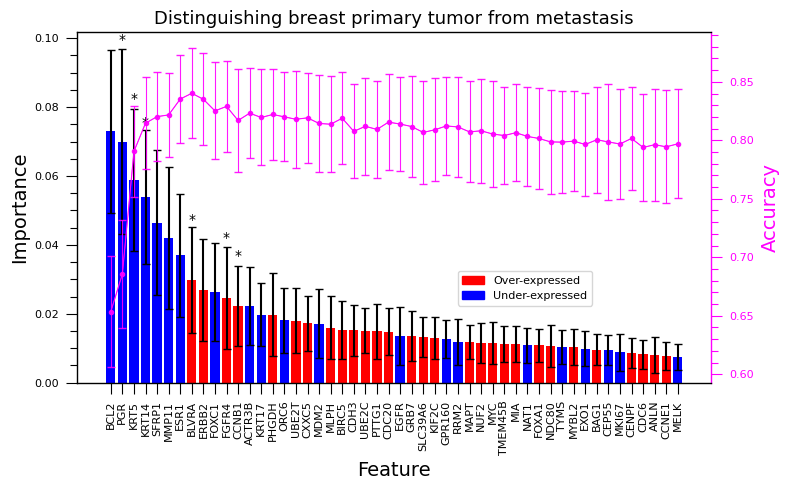

In [28]:
%%time
label_canc='Distinguishing breast primary tumor from metastasis'
#class weight balanced here
#DO NOT MAKE mistake on title label. be careful 
fig, ax = plt.subplots(1,1, figsize=(8, 5))
n=500
feature_importance=[]
accuracy=[]
test_size=0.50
auc_roc=[]
f1score_normal=[]
f1score_primtum=[]
y_test_total=[]
y_pred_total=[]
cum_acc_mean=[]
cum_acc_std=[]
cum_acc_itg=[]
feature_importances={"feature": [],"importance": []}
#first calculate the feature importance and accuracy etc.
for iteration in range(n):
    X = temp_aur_bcm_df.loc[temp_aur_bcm_df.index.isin(PAM50_geneset)].T
    y = temp_aur_bcm_df.loc['sample_cat']
    #scaler = StandardScaler()
    #X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
    ### Random Forest Classifier ###
    classifier = RandomForestClassifier(n_estimators=100, random_state=42,
                                        class_weight= 'balanced')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    y_test_total=y_test_total+list(y_test)
    y_pred_total=y_pred_total+list(y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    f1score_normal.append(f1_score(y_test,y_pred,pos_label = 'Primary tumor'))
    f1score_primtum.append(f1_score(y_test,y_pred,pos_label = 'Metastatic tumor'))    
    auc_roc.append(roc_auc_score(y_test,classifier.predict_proba(X_test)[:,1]))
    for i,j in zip(X.columns,classifier.feature_importances_):
        feature_importances['feature'].append(i) 
        feature_importances['importance'].append(j)
    del X_train, X_test, y_train, y_test 
#now plotting
#pd.DataFrame(accuracy,columns=['accuracy']).plot(kind='hist',edgecolor='black',ax=ax[0],legend=False)
# ax[0].set_title(f"n= {n}",fontsize=25)
# #ax[0].legend(fontsize=8)
# plt.setp(ax[0].get_xticklabels(),fontsize=12)
# plt.setp(ax[0].get_yticklabels(),fontsize=12)
# ax[0].set_ylabel('Frequency',fontsize=25)

feature_importance_df=pd.DataFrame(feature_importances).set_index('feature')
feature_importance_df = feature_importance_df.sort_values(by='importance')

# for i in ['top', 'left', 'right', 'bottom']:
#     ax[0].spines[i].set_linewidth(1)

# ax[0].minorticks_on()
# ax[0].tick_params(axis='both', which='major', labelsize=12, width = 0.8, size = 8,pad=5)
# ax[0].tick_params(axis='both', which='minor', width = 0.8, size = 5)   
# ax[0].set_xlabel('Accuracy',fontsize=25)


#feature_importance_df_mean=feature_importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False)

#feature_importance_df_err=feature_importance_df.groupby('feature').std().loc[feature_importance_df_mean.index]


feature_importance_df_mean=feature_importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False)
feature_importance_df_mean=pd.concat([feature_importance_df_mean,pam50_gene_expr_df],axis=1)
feature_importance_df_err=feature_importance_df.groupby('feature').std().loc[feature_importance_df_mean.index]
colors = feature_importance_df_mean.groupby('relative_expression')['bar_color'].apply(lambda x: list(x.unique())[0]).to_dict()

#now calculate cumulatve feature vs accuracy
for cum_gene in range(1,feature_importance_df_mean.shape[0]+1):
    cum_individual_accuracy = []
    for iteration in range(n):
        X = temp_aur_bcm_df.loc[feature_importance_df_mean.index[0:cum_gene]].T
        y = temp_aur_bcm_df.loc['sample_cat']
        #scaler = StandardScaler()
        #X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
        ### Random Forest Classifier ###
        classifier = RandomForestClassifier(n_estimators=100, random_state=42,
                                            class_weight= 'balanced')
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        cum_individual_accuracy.append(accuracy_score(y_test,y_pred))
        del X_train, X_test, y_train, y_test
    cum_acc_itg.append(temp_aur_bcm_df.loc[feature_importance_df_mean.index[cum_gene-1]].name)
    cum_acc_mean.append(np.mean(np.array(cum_individual_accuracy)))
    cum_acc_std.append(np.std(np.array(cum_individual_accuracy)))

#first plot the barplot
bars=ax.bar(feature_importance_df_mean.index,
    feature_importance_df_mean['importance'],
                                yerr=feature_importance_df_err['importance'].values,
                                capsize=3,
                                    color=feature_importance_df_mean.bar_color)
for bar,integrin in zip(bars.patches,feature_importance_df_mean.index):
    if feature_importance_df_mean.loc[integrin]['adj_significant_bonf']=='yes':
        ax.annotate('*',
                   (bar.get_x() + bar.get_width()/2,
                    bar.get_height()+float(format(feature_importance_df_err.loc[integrin]['importance'],'0.3f'))), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')

ax2 = ax.twinx()
#plot the cum accuracy feature
ax2.errorbar(cum_acc_itg, cum_acc_mean,
            yerr=cum_acc_std,capsize=3,color='magenta', alpha=0.9, lw=0.8)
ax2.plot(cum_acc_itg, cum_acc_mean, '-o',markersize=3,
         color='magenta', lw=0.5, alpha=0.9)
ax2.set_ylabel('Accuracy', fontsize=14,labelpad=5, color='magenta')


ax.set_title(f"{label_canc}",fontsize=13)

plt.setp(ax.get_xticklabels(),fontsize=8,rotation=90)
plt.setp(ax2.get_yticklabels(),fontsize=8)
ax.set_xlabel('Feature',fontsize=14)
ax.set_ylabel('Importance',fontsize=14,color='black')
#ax.legend(feature_importance_df_mean.relative_expression.unique(),fontsize=17)
handles = [mpatches.Patch(color=colors[i]) for i in colors]
labels = ['Over-expressed' if i=='high' else 'Under-expressed' for i in colors ]
ax.legend(handles, labels,fontsize=8,loc=(0.6,0.22))


for i in ['top', 'left', 'bottom','right']:
    ax.spines[i].set_visible(False)

for i in ['top', 'left', 'bottom','right']:
    ax2.spines[i].set_linewidth(1)

ax2.spines['right'].set_color('magenta')    
ax2.spines['right'].set_linewidth(1)    
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=8, width = 0.8, size = 8,pad=5)
ax.tick_params(axis='y', which='minor', width = 0.8, size = 5)    

ax2.minorticks_on()
ax2.tick_params(axis='both', which='major', labelsize=8, width = 0.8, size = 8,pad=5,colors='magenta')
ax2.tick_params(axis='y', which='minor', width = 0.8, size = 5,colors='magenta')    
ax2.xaxis.set_minor_locator(tck.NullLocator())

# ax.text(0.6,
#            0.45,f'Mean accuracy = {format(np.mean(np.array(accuracy)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(accuracy)),"0.3f")}',
#            transform=ax.transAxes,fontsize=8)
# ax.text(0.45,
#            0.45,f'Mean AUROC = {format(np.mean(np.array(auc_roc)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(auc_roc)),"0.3f")}',
#            transform=ax.transAxes,fontsize=8)
# ax.text(0.45,
#            0.4,f'Mean F1 (primary tumor) = {format(np.mean(np.array(f1score_normal)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(f1score_normal)),"0.3f")}',
#            transform=ax.transAxes,fontsize=8)
# ax.text(0.45,
#            0.35,f'Mean F1 (metastasis) = {format(np.mean(np.array(f1score_primtum)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(f1score_primtum)),"0.3f")}',
#            transform=ax.transAxes,fontsize=8)
#ConfusionMatrixDisplay.from_predictions(y_test_total, y_pred_total,normalize='true')


#ax[0].remove()
plt.tight_layout()

plt.savefig(f'AURORA_figures/RF_PAM50_AURORA_all_metastasis_sites.png', dpi = 1000, bbox_inches='tight')
del  feature_importance, feature_importance_df, feature_importance_df_mean, feature_importance_df_err, pam50_gene_expr_df



In [29]:
donato_expr_dict={'donato_gene':[],'primtum_mean':[],'primtum_sem':[],'met_mean':[],
               'met_sem':[],
               'relative_expression':[],'p_value':[],'significant':[]}
p_value_cutoff=0.05
for donato_gene in donato_ctc_32genesig:
    donato_expr_dict['donato_gene'].append(donato_gene)
    primtum_sample_expr=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[donato_gene].mean()
    primtum_sample_sem=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[donato_gene].sem()
    met_sample_expr=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Metastatic tumor'].loc[donato_gene].mean()
    met_sample_sem=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Metastatic tumor'].loc[donato_gene].sem()
    donato_expr_dict['primtum_mean'].append(primtum_sample_expr)
    donato_expr_dict['primtum_sem'].append(primtum_sample_sem)
    donato_expr_dict['met_mean'].append(met_sample_expr)
    donato_expr_dict['met_sem'].append(met_sample_sem)
    if (met_sample_expr - primtum_sample_expr)>0:
        donato_expr_dict['relative_expression'].append('high')
    elif (met_sample_expr - primtum_sample_expr)<0:
        donato_expr_dict['relative_expression'].append('low')
    else:
        donato_expr_dict['relative_expression'].append('same')
    p_value_donato_gene=stats.ttest_ind(a=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[donato_gene].astype('float64').values,
                                                    b=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Metastatic tumor'].loc[donato_gene].astype('float64').values).pvalue
    donato_expr_dict['p_value'].append(p_value_donato_gene) 
    if p_value_donato_gene>=p_value_cutoff:
        donato_expr_dict['significant'].append('no')
    else:
        donato_expr_dict['significant'].append('yes')
        
donato_gene_expr_df=pd.DataFrame(donato_expr_dict).set_index('donato_gene')
del donato_expr_dict, primtum_sample_expr, primtum_sample_sem, met_sample_expr, met_sample_sem

donato_gene_expr_df = donato_gene_expr_df.sort_values(by='relative_expression')
donato_gene_expr_df['bar_color']=['red' if expr=='high' else 'blue' if expr=='low' else 'green' for expr in donato_gene_expr_df['relative_expression'].values]
donato_gene_expr_df


,primtum_mean,primtum_sem,met_mean,met_sem,relative_expression,p_value,significant,bar_color
donato_gene,,,,,,,,
TMEM125,8.369365,0.263073,9.682496,0.157890,high,1.274321e-05,yes,red
HIF1A,13.383303,0.142773,13.445411,0.121180,high,7.497473e-01,no,red
GDF15,7.692726,0.300108,8.888990,0.277958,high,6.850065e-03,yes,red
FAM13A,11.547643,0.135035,11.700641,0.127227,high,4.415103e-01,no,red
ZNF771,8.212160,0.075584,8.526014,0.077184,high,8.812632e-03,yes,red
P4HA1,11.895839,0.159262,12.678446,0.127124,high,2.563835e-04,yes,red
UBALD1,9.044335,0.107660,9.114773,0.112745,high,6.815332e-01,no,red
CLCN2,8.540672,0.122178,8.814520,0.084696,high,6.231835e-02,no,red
EPHX2,9.348493,0.158047,9.840751,0.136217,high,2.532844e-02,yes,red


In [30]:
#now going to do multiple testing correction (careful must be run once after running previous cell)
pvals=donato_gene_expr_df.p_value.values
#trying benjamin hochberg, calculuating p values and corresponding sig
donato_gene_expr_df['adj_p_val_bh']=multi.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
donato_gene_expr_df['adj_significant_bh']=['yes' if p_value<p_value_cutoff else 'no' for p_value in donato_gene_expr_df['adj_p_val_bh'].values ]
#trying , calculuating p values and corresponding sig
donato_gene_expr_df['adj_p_val_bonf']=multi.multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)[1]
donato_gene_expr_df['adj_significant_bonf']=['yes' if p_value<p_value_cutoff else 'no' for p_value in donato_gene_expr_df['adj_p_val_bonf'].values ]
donato_gene_expr_df


,primtum_mean,primtum_sem,met_mean,met_sem,relative_expression,p_value,significant,bar_color,adj_p_val_bh,adj_significant_bh,adj_p_val_bonf,adj_significant_bonf
donato_gene,,,,,,,,,,,,
TMEM125,8.369365,0.263073,9.682496,0.157890,high,1.274321e-05,yes,red,0.000099,yes,0.000395,yes
HIF1A,13.383303,0.142773,13.445411,0.121180,high,7.497473e-01,no,red,0.749747,no,1.000000,no
GDF15,7.692726,0.300108,8.888990,0.277958,high,6.850065e-03,yes,red,0.019305,yes,0.212352,no
FAM13A,11.547643,0.135035,11.700641,0.127227,high,4.415103e-01,no,red,0.471959,no,1.000000,no
ZNF771,8.212160,0.075584,8.526014,0.077184,high,8.812632e-03,yes,red,0.022766,yes,0.273192,no
P4HA1,11.895839,0.159262,12.678446,0.127124,high,2.563835e-04,yes,red,0.001325,yes,0.007948,yes
UBALD1,9.044335,0.107660,9.114773,0.112745,high,6.815332e-01,no,red,0.704251,no,1.000000,no
CLCN2,8.540672,0.122178,8.814520,0.084696,high,6.231835e-02,no,red,0.087812,no,1.000000,no
EPHX2,9.348493,0.158047,9.840751,0.136217,high,2.532844e-02,yes,red,0.052345,no,0.785182,no


CPU times: user 17min 6s, sys: 4.13 s, total: 17min 10s
Wall time: 17min 13s


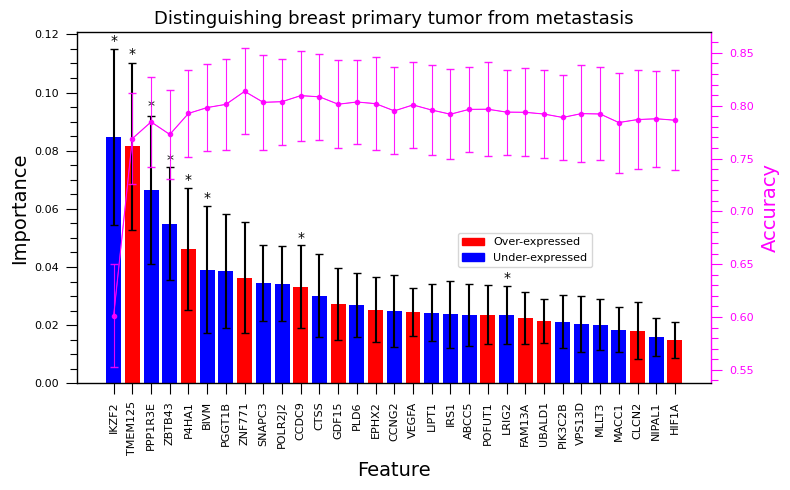

In [31]:
%%time
label_canc='Distinguishing breast primary tumor from metastasis'
#class weight balanced here
#DO NOT MAKE mistake on title label. be careful 
fig, ax = plt.subplots(1,1, figsize=(8, 5))
n=500
feature_importance=[]
accuracy=[]
test_size=0.50
auc_roc=[]
f1score_normal=[]
f1score_primtum=[]
y_test_total=[]
y_pred_total=[]
cum_acc_mean=[]
cum_acc_std=[]
cum_acc_itg=[]
feature_importances={"feature": [],"importance": []}
#first calculate the feature importance and accuracy etc.
for iteration in range(n):
    X = temp_aur_bcm_df.loc[temp_aur_bcm_df.index.isin(donato_ctc_32genesig)].T
    y = temp_aur_bcm_df.loc['sample_cat']
    #scaler = StandardScaler()
    #X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
    ### Random Forest Classifier ###
    classifier = RandomForestClassifier(n_estimators=100, random_state=42,
                                        class_weight= 'balanced')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    y_test_total=y_test_total+list(y_test)
    y_pred_total=y_pred_total+list(y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    f1score_normal.append(f1_score(y_test,y_pred,pos_label = 'Primary tumor'))
    f1score_primtum.append(f1_score(y_test,y_pred,pos_label = 'Metastatic tumor'))    
    auc_roc.append(roc_auc_score(y_test,classifier.predict_proba(X_test)[:,1]))
    for i,j in zip(X.columns,classifier.feature_importances_):
        feature_importances['feature'].append(i) 
        feature_importances['importance'].append(j)
    del X_train, X_test, y_train, y_test 
#now plotting
#pd.DataFrame(accuracy,columns=['accuracy']).plot(kind='hist',edgecolor='black',ax=ax[0],legend=False)
# ax[0].set_title(f"n= {n}",fontsize=25)
# #ax[0].legend(fontsize=8)
# plt.setp(ax[0].get_xticklabels(),fontsize=12)
# plt.setp(ax[0].get_yticklabels(),fontsize=12)
# ax[0].set_ylabel('Frequency',fontsize=25)

feature_importance_df=pd.DataFrame(feature_importances).set_index('feature')
feature_importance_df = feature_importance_df.sort_values(by='importance')

# for i in ['top', 'left', 'right', 'bottom']:
#     ax[0].spines[i].set_linewidth(1)

# ax[0].minorticks_on()
# ax[0].tick_params(axis='both', which='major', labelsize=12, width = 0.8, size = 8,pad=5)
# ax[0].tick_params(axis='both', which='minor', width = 0.8, size = 5)   
# ax[0].set_xlabel('Accuracy',fontsize=25)


#feature_importance_df_mean=feature_importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False)

#feature_importance_df_err=feature_importance_df.groupby('feature').std().loc[feature_importance_df_mean.index]


feature_importance_df_mean=feature_importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False)
feature_importance_df_mean=pd.concat([feature_importance_df_mean,donato_gene_expr_df],axis=1)
feature_importance_df_err=feature_importance_df.groupby('feature').std().loc[feature_importance_df_mean.index]
colors = feature_importance_df_mean.groupby('relative_expression')['bar_color'].apply(lambda x: list(x.unique())[0]).to_dict()

#now calculate cumulatve feature vs accuracy
for cum_gene in range(1,feature_importance_df_mean.shape[0]+1):
    cum_individual_accuracy = []
    for iteration in range(n):
        X = temp_aur_bcm_df.loc[feature_importance_df_mean.index[0:cum_gene]].T
        y = temp_aur_bcm_df.loc['sample_cat']
        #scaler = StandardScaler()
        #X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
        ### Random Forest Classifier ###
        classifier = RandomForestClassifier(n_estimators=100, random_state=42,
                                            class_weight= 'balanced')
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        cum_individual_accuracy.append(accuracy_score(y_test,y_pred))
        del X_train, X_test, y_train, y_test
    cum_acc_itg.append(temp_aur_bcm_df.loc[feature_importance_df_mean.index[cum_gene-1]].name)
    cum_acc_mean.append(np.mean(np.array(cum_individual_accuracy)))
    cum_acc_std.append(np.std(np.array(cum_individual_accuracy)))

#first plot the barplot
bars=ax.bar(feature_importance_df_mean.index,
    feature_importance_df_mean['importance'],
                                yerr=feature_importance_df_err['importance'].values,
                                capsize=3,
                                    color=feature_importance_df_mean.bar_color)
for bar,integrin in zip(bars.patches,feature_importance_df_mean.index):
    if feature_importance_df_mean.loc[integrin]['adj_significant_bonf']=='yes':
        ax.annotate('*',
                   (bar.get_x() + bar.get_width()/2,
                    bar.get_height()+float(format(feature_importance_df_err.loc[integrin]['importance'],'0.3f'))), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')

ax2 = ax.twinx()
#plot the cum accuracy feature
ax2.errorbar(cum_acc_itg, cum_acc_mean,
            yerr=cum_acc_std,capsize=3,color='magenta', alpha=0.9, lw=0.8)
ax2.plot(cum_acc_itg, cum_acc_mean, '-o',markersize=3,
         color='magenta', lw=0.5, alpha=0.9)
ax2.set_ylabel('Accuracy', fontsize=14,labelpad=5, color='magenta')


ax.set_title(f"{label_canc}",fontsize=13)

plt.setp(ax.get_xticklabels(),fontsize=8,rotation=90)
plt.setp(ax2.get_yticklabels(),fontsize=8)
ax.set_xlabel('Feature',fontsize=14)
ax.set_ylabel('Importance',fontsize=14,color='black')
#ax.legend(feature_importance_df_mean.relative_expression.unique(),fontsize=17)
handles = [mpatches.Patch(color=colors[i]) for i in colors]
labels = ['Over-expressed' if i=='high' else 'Under-expressed' for i in colors ]
ax.legend(handles, labels,fontsize=8,loc=(0.6,0.33))


for i in ['top', 'left', 'bottom','right']:
    ax.spines[i].set_visible(False)

for i in ['top', 'left', 'bottom','right']:
    ax2.spines[i].set_linewidth(1)

ax2.spines['right'].set_color('magenta')    
ax2.spines['right'].set_linewidth(1)    
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=8, width = 0.8, size = 8,pad=5)
ax.tick_params(axis='y', which='minor', width = 0.8, size = 5)    

ax2.minorticks_on()
ax2.tick_params(axis='both', which='major', labelsize=8, width = 0.8, size = 8,pad=5,colors='magenta')
ax2.tick_params(axis='y', which='minor', width = 0.8, size = 5,colors='magenta')    
ax2.xaxis.set_minor_locator(tck.NullLocator())

# ax.text(0.6,
#            0.45,f'Mean accuracy = {format(np.mean(np.array(accuracy)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(accuracy)),"0.3f")}',
#            transform=ax.transAxes,fontsize=8)
# ax.text(0.45,
#            0.55,f'Mean AUROC = {format(np.mean(np.array(auc_roc)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(auc_roc)),"0.3f")}',
#            transform=ax.transAxes,fontsize=8)
# ax.text(0.45,
#            0.5,f'Mean F1 (primary tumor) = {format(np.mean(np.array(f1score_normal)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(f1score_normal)),"0.3f")}',
#            transform=ax.transAxes,fontsize=8)
# ax.text(0.45,
#            0.45,f'Mean F1 (metastasis) = {format(np.mean(np.array(f1score_primtum)),"0.2f")} '+r'$\pm$'+f' {format(np.std(np.array(f1score_primtum)),"0.3f")}',
#            transform=ax.transAxes,fontsize=8)
#ConfusionMatrixDisplay.from_predictions(y_test_total, y_pred_total,normalize='true')


#ax[0].remove()
plt.tight_layout()

plt.savefig(f'AURORA_figures/RF_donato_AURORA_all_metastasis_sites.png', dpi = 1000, bbox_inches='tight')
del  feature_importance, feature_importance_df, feature_importance_df_mean, feature_importance_df_err, donato_gene_expr_df



In [38]:
del temp_aur_bcm_df, temp_info_sample, itg_temp_aur_bcm_df, itg_vp_df,itg_expr_df

NameError: name 'temp_aur_bcm_df' is not defined

# checking primary tumor (post-treatment+pre-treatment) vs liver, lung, lymph node and brain metastatic tumor

 # not patient-matched

In [17]:
#separating primary tumor and metastatic tumor

temp_info_sample = geo_clin_matrix[geo_clin_matrix.source_name_ch1!='Normal tissue'].copy()

#only get metastasis data from these below sites
chosen_total_sites = ['Breast','Liver', 'Lymph node','Brain','Lung']

temp_info_sample = temp_info_sample[temp_info_sample['characteristics_ch1.1.tissue'].isin(chosen_total_sites)]

#get metastasis data only for patients for whom primary data is available
#get common patients between primary and metastasis
#Use this little chunk if patient-matched samples needed to be used
#common_patid = pd.Index(temp_info_sample[temp_info_sample['source_name_ch1']=='Primary tumor'].patient_id).intersection(temp_info_sample[temp_info_sample['source_name_ch1']=='Metastatic tumor'].patient_id)
#temp_info_sample = temp_info_sample[temp_info_sample['patient_id'].isin(common_patid)]


#now separate primary tumor from metastasis
primtum_temp_info_sample = temp_info_sample[temp_info_sample.source_name_ch1=='Primary tumor']
met_temp_info_sample = temp_info_sample[temp_info_sample.source_name_ch1=='Metastatic tumor']

#gene expression
temp_aur_bcm_df = geo_expr[temp_info_sample['sample_id']].copy()




In [18]:
#add sample category information to temp_aur_bcm_df

temp_aur_bcm_df.loc['sample_cat'] = [met_temp_info_sample['source_name_ch1'].unique()[0] if samid in met_temp_info_sample['sample_id'].values else primtum_temp_info_sample['source_name_ch1'].unique()[0] if samid in primtum_temp_info_sample['sample_id'].values else 0 for samid in temp_aur_bcm_df.columns]

if 0 in temp_aur_bcm_df.loc['sample_cat'].values:
    print('ERROR plz check')

    
#add sample location information to temp_aur_bcm_df

temp_aur_bcm_df.loc['sample_loc'] = [temp_info_sample[temp_info_sample['sample_id']==samid]['characteristics_ch1.1.tissue'].values[0] for samid in temp_aur_bcm_df.columns]

    

In [19]:
itg_expr_dict={'integrin':[],'primtum_mean':[],'primtum_sem':[],'liver_mean':[],
               'liver_sem':[],'lymphnode_mean':[], 'lymphnode_sem':[],'brain_mean':[], 'brain_sem':[],
               'lung_mean':[], 'lung_sem':[],
               'liver_relative_expression':[],'liver_p_value':[],'liversignificant':[],
              'lymphnode_relative_expression':[],'lymphnode_p_value':[],'lymphnodesignificant':[],
              'brain_relative_expression':[],'brain_p_value':[],'brainsignificant':[],
              'lung_relative_expression':[],'lung_p_value':[],'lungsignificant':[]}
p_value_cutoff=0.05
for itg in temp_aur_bcm_df.loc[~temp_aur_bcm_df.index.isin(['sample_cat','sample_loc'])].loc[itg_expr.index].index:
    itg_expr_dict['integrin'].append(itg)
    primtum_sample_expr=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[itg].mean()
    primtum_sample_sem=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[itg].sem()
    liver_sample_expr=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Liver'].loc[itg].mean()
    liver_sample_sem=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Liver'].loc[itg].sem()
    lymphnode_sample_expr=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Lymph node'].loc[itg].mean()
    lymphnode_sample_sem=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Lymph node'].loc[itg].sem()
    brain_sample_expr=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Brain'].loc[itg].mean()
    brain_sample_sem=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Brain'].loc[itg].sem()
    lung_sample_expr=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Lung'].loc[itg].mean()
    lung_sample_sem=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Lung'].loc[itg].sem()    
    itg_expr_dict['primtum_mean'].append(primtum_sample_expr)
    itg_expr_dict['primtum_sem'].append(primtum_sample_sem)
    itg_expr_dict['liver_mean'].append(liver_sample_expr)
    itg_expr_dict['liver_sem'].append(liver_sample_sem)    
    itg_expr_dict['lymphnode_mean'].append(lymphnode_sample_expr)
    itg_expr_dict['lymphnode_sem'].append(lymphnode_sample_sem)    
    itg_expr_dict['brain_mean'].append(brain_sample_expr)
    itg_expr_dict['brain_sem'].append(brain_sample_sem)    
    itg_expr_dict['lung_mean'].append(lung_sample_expr)
    itg_expr_dict['lung_sem'].append(lung_sample_sem)    
    
    itg_expr_dict['liver_relative_expression'].append(liver_sample_expr - primtum_sample_expr)
    p_value_itg=stats.ttest_ind(a=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[itg].astype('float64').values,
                                                    b=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Liver'].loc[itg].astype('float64').values).pvalue
    itg_expr_dict['liver_p_value'].append(p_value_itg) 
    if p_value_itg>=p_value_cutoff:
        itg_expr_dict['liversignificant'].append('no')
    else:
        itg_expr_dict['liversignificant'].append('yes')
    del p_value_itg
    itg_expr_dict['lymphnode_relative_expression'].append(lymphnode_sample_expr - primtum_sample_expr)
    p_value_itg=stats.ttest_ind(a=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[itg].astype('float64').values,
                                                    b=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Lymph node'].loc[itg].astype('float64').values).pvalue
    itg_expr_dict['lymphnode_p_value'].append(p_value_itg) 
    if p_value_itg>=p_value_cutoff:
        itg_expr_dict['lymphnodesignificant'].append('no')
    else:
        itg_expr_dict['lymphnodesignificant'].append('yes')
    del p_value_itg        
    itg_expr_dict['brain_relative_expression'].append(brain_sample_expr - primtum_sample_expr)
    p_value_itg=stats.ttest_ind(a=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[itg].astype('float64').values,
                                                    b=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Brain'].loc[itg].astype('float64').values).pvalue
    itg_expr_dict['brain_p_value'].append(p_value_itg) 
    if p_value_itg>=p_value_cutoff:
        itg_expr_dict['brainsignificant'].append('no')
    else:
        itg_expr_dict['brainsignificant'].append('yes')
    del p_value_itg

    itg_expr_dict['lung_relative_expression'].append(lung_sample_expr - primtum_sample_expr)
    p_value_itg=stats.ttest_ind(a=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_cat']=='Primary tumor'].loc[itg].astype('float64').values,
                                                    b=temp_aur_bcm_df.loc[:,temp_aur_bcm_df.loc['sample_loc']=='Lung'].loc[itg].astype('float64').values).pvalue
    itg_expr_dict['lung_p_value'].append(p_value_itg) 
    if p_value_itg>=p_value_cutoff:
        itg_expr_dict['lungsignificant'].append('no')
    else:
        itg_expr_dict['lungsignificant'].append('yes')
    del p_value_itg    
    
itg_expr_df=pd.DataFrame(itg_expr_dict).set_index('integrin')
del itg_expr_dict, primtum_sample_expr, primtum_sample_sem, liver_sample_expr, liver_sample_sem

itg_expr_df = itg_expr_df.sort_values(by='liver_relative_expression')
itg_expr_df


,primtum_mean,primtum_sem,liver_mean,liver_sem,lymphnode_mean,lymphnode_sem,brain_mean,brain_sem,lung_mean,lung_sem,...,liversignificant,lymphnode_relative_expression,lymphnode_p_value,lymphnodesignificant,brain_relative_expression,brain_p_value,brainsignificant,lung_relative_expression,lung_p_value,lungsignificant
integrin,,,,,,,,,,,,,,,,,,,,,
ITGBL1,11.387463,0.158249,9.126497,0.460051,9.381391,0.543645,9.793450,0.793159,10.586687,0.344116,...,yes,-2.006072,0.000011,yes,-1.594013,0.002155,yes,-0.800776,0.050441,no
ITGA4,11.235310,0.153913,9.111084,0.274311,10.706112,0.305711,9.927119,0.355420,10.247627,0.387368,...,yes,-0.529198,0.129597,no,-1.308190,0.001043,yes,-0.987683,0.016115,yes
ITGA11,11.711669,0.171578,9.658833,0.256901,10.675763,0.355321,9.922119,0.361613,10.481431,0.435515,...,yes,-1.035906,0.009740,yes,-1.789550,0.000070,yes,-1.230238,0.007657,yes
ITGA7,9.842509,0.158034,7.887956,0.330624,9.649137,0.384620,10.480833,0.313228,9.055007,0.606410,...,yes,-0.193373,0.602486,no,0.638323,0.096994,no,-0.787503,0.084709,no
ITGB8,12.851751,0.233533,10.971168,0.424587,13.296209,0.556387,12.763414,0.611224,12.562216,0.843841,...,yes,0.444458,0.416251,no,-0.088337,0.880422,no,-0.289535,0.657994,no
ITGAX,11.396115,0.147815,9.613636,0.357781,10.863066,0.384083,9.935147,0.362744,10.907044,0.567688,...,yes,-0.533050,0.135141,no,-1.460968,0.000205,yes,-0.489072,0.248516,no
ITGA8,9.152695,0.163624,7.619316,0.280535,8.937075,0.437299,9.690076,0.310301,9.930439,0.644270,...,yes,-0.215621,0.584649,no,0.537381,0.172892,no,0.777744,0.102277,no
ITGAM,10.204153,0.139301,8.678494,0.331980,10.057413,0.191582,9.443277,0.330772,10.296984,0.488544,...,yes,-0.146741,0.621644,no,-0.760877,0.030586,yes,0.092831,0.810284,no
ITGAL,10.289934,0.206649,8.817443,0.309339,9.722866,0.402247,8.843957,0.406147,9.496541,0.431867,...,yes,-0.567069,0.222883,no,-1.445978,0.005030,yes,-0.793394,0.132790,no


In [20]:

#bonferroni adjust ment for liver and lung separately
#now going to do multiple testing correction (careful must be run once after running previous cell)
pvals=itg_expr_df.liver_p_value.values
#trying , calculuating p values and corresponding sig
itg_expr_df['adj_liver_p_val_bonf']=multi.multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)[1]
itg_expr_df['adj_liver_significant_bonf']=['yes' if p_value<p_value_cutoff else 'no' for p_value in itg_expr_df['adj_liver_p_val_bonf'].values ]

del pvals

pvals=itg_expr_df.lung_p_value.values
#trying , calculuating p values and corresponding sig
itg_expr_df['adj_lung_p_val_bonf']=multi.multipletests(pvals, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)[1]
itg_expr_df['adj_lung_significant_bonf']=['yes' if p_value<p_value_cutoff else 'no' for p_value in itg_expr_df['adj_lung_p_val_bonf'].values ]


itg_expr_df

,primtum_mean,primtum_sem,liver_mean,liver_sem,lymphnode_mean,lymphnode_sem,brain_mean,brain_sem,lung_mean,lung_sem,...,brain_relative_expression,brain_p_value,brainsignificant,lung_relative_expression,lung_p_value,lungsignificant,adj_liver_p_val_bonf,adj_liver_significant_bonf,adj_lung_p_val_bonf,adj_lung_significant_bonf
integrin,,,,,,,,,,,,,,,,,,,,,
ITGBL1,11.387463,0.158249,9.126497,0.460051,9.381391,0.543645,9.793450,0.793159,10.586687,0.344116,...,-1.594013,0.002155,yes,-0.800776,0.050441,no,4.672802e-06,yes,1.000000,no
ITGA4,11.235310,0.153913,9.111084,0.274311,10.706112,0.305711,9.927119,0.355420,10.247627,0.387368,...,-1.308190,0.001043,yes,-0.987683,0.016115,yes,3.900352e-08,yes,0.435099,no
ITGA11,11.711669,0.171578,9.658833,0.256901,10.675763,0.355321,9.922119,0.361613,10.481431,0.435515,...,-1.789550,0.000070,yes,-1.230238,0.007657,yes,4.359261e-07,yes,0.206751,no
ITGA7,9.842509,0.158034,7.887956,0.330624,9.649137,0.384620,10.480833,0.313228,9.055007,0.606410,...,0.638323,0.096994,no,-0.787503,0.084709,no,3.030597e-06,yes,1.000000,no
ITGB8,12.851751,0.233533,10.971168,0.424587,13.296209,0.556387,12.763414,0.611224,12.562216,0.843841,...,-0.088337,0.880422,no,-0.289535,0.657994,no,3.000972e-03,yes,1.000000,no
ITGAX,11.396115,0.147815,9.613636,0.357781,10.863066,0.384083,9.935147,0.362744,10.907044,0.567688,...,-1.460968,0.000205,yes,-0.489072,0.248516,no,2.230159e-05,yes,1.000000,no
ITGA8,9.152695,0.163624,7.619316,0.280535,8.937075,0.437299,9.690076,0.310301,9.930439,0.644270,...,0.537381,0.172892,no,0.777744,0.102277,no,1.978692e-04,yes,1.000000,no
ITGAM,10.204153,0.139301,8.678494,0.331980,10.057413,0.191582,9.443277,0.330772,10.296984,0.488544,...,-0.760877,0.030586,yes,0.092831,0.810284,no,1.266986e-04,yes,1.000000,no
ITGAL,10.289934,0.206649,8.817443,0.309339,9.722866,0.402247,8.843957,0.406147,9.496541,0.431867,...,-1.445978,0.005030,yes,-0.793394,0.132790,no,6.952752e-03,yes,1.000000,no


without vmin vmax, just checking cbar limits


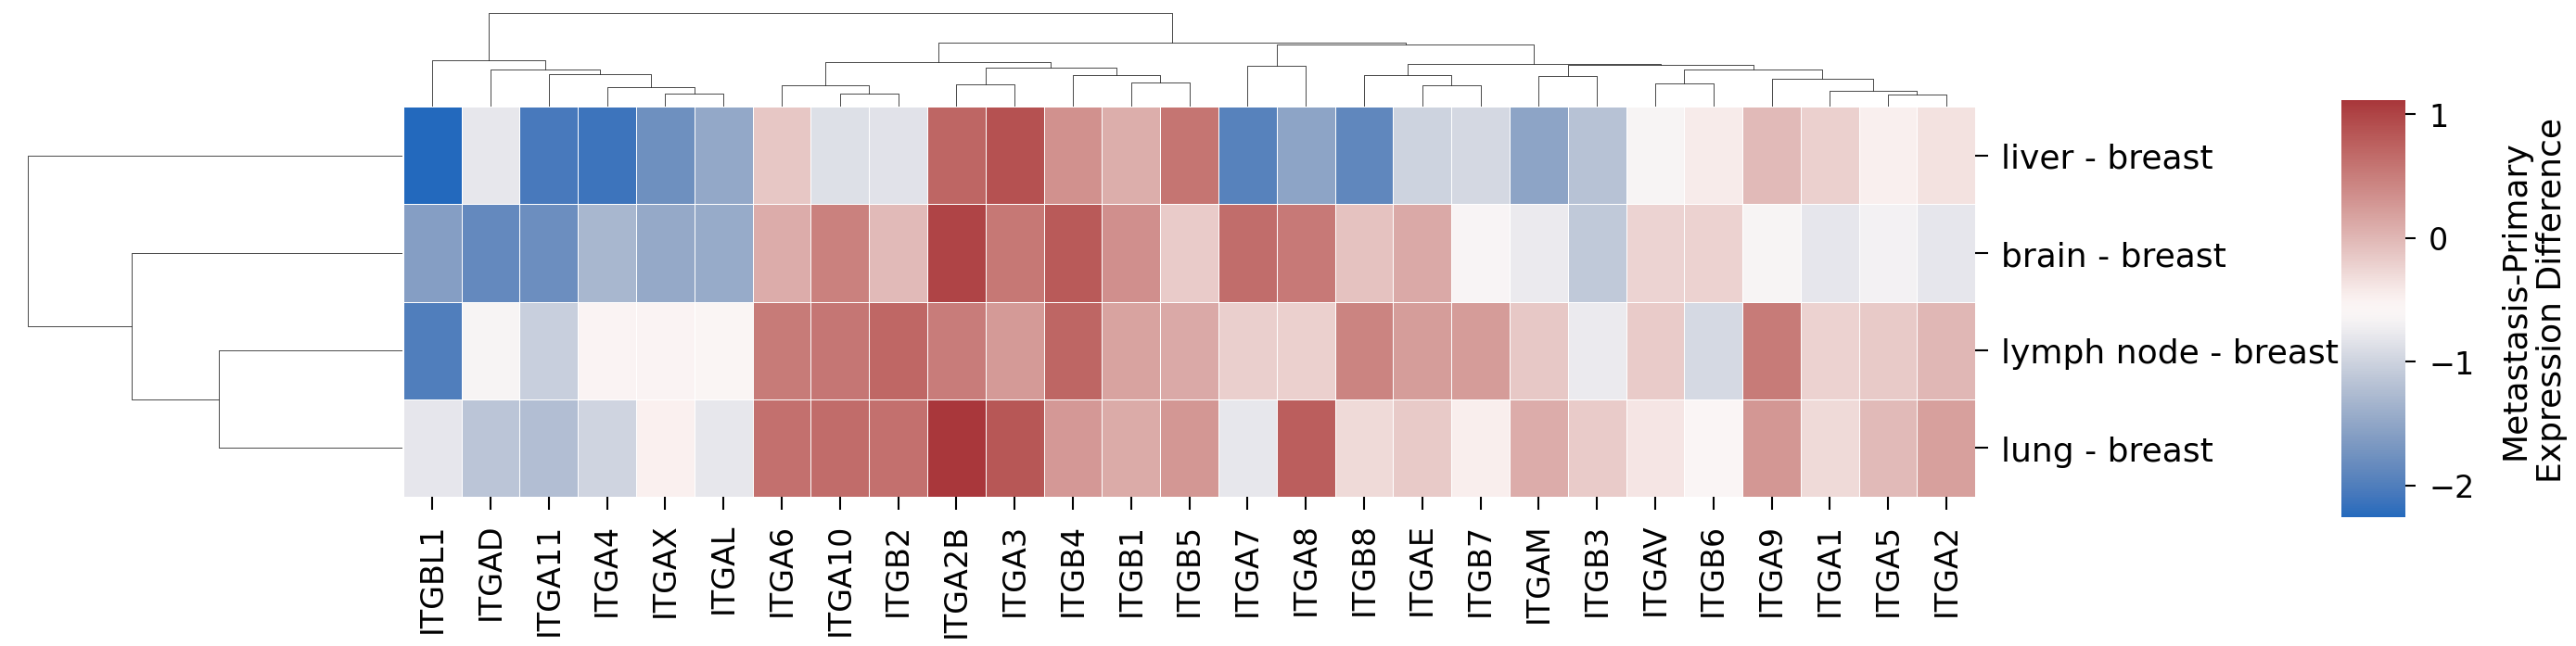

In [23]:
print('without vmin vmax, just checking cbar limits')
#heatmap_df = itg_expr_df[itg_expr_df.columns[(itg_expr_df.columns.str.contains('relative')) | (itg_expr_df.columns.str.contains('primtum_mean'))]].copy()
heatmap_df = itg_expr_df[itg_expr_df.columns[itg_expr_df.columns.str.contains('relative')]].copy()
#convert to Z-score
#heatmap_df = (heatmap_df-heatmap_df.mean())/heatmap_df.std()

#rename columns using this map
col_map={}
col_map['primtum_mean'] = 'primary tumor' 
col_map['liver_relative_expression'] = 'liver - breast' 
col_map['lymphnode_relative_expression'] = 'lymph node - breast' 
col_map['brain_relative_expression'] = 'brain - breast' 
col_map['lung_relative_expression'] = 'lung - breast' 

#rename columns
heatmap_df = heatmap_df.rename(columns = col_map).copy()


ax = sns.clustermap(heatmap_df.T, cmap='vlag', row_cluster=True, col_cluster=True,
                    method='average', metric='cityblock', linewidths=0.5, 
                    fmt='', figsize=(23,6), tree_kws={'colors':'black'},
                    annot_kws={"size": 20},cbar_kws={'orientation':'vertical'})
                                                        #, xticklabels=False

ax.tick_params(axis='x', labelrotation=90, labelsize=24, size=10, width=1.5, pad=10)
ax.tick_params(axis='y', labelrotation=0, labelsize=26, size=10, width=1.5, pad=10)
ax.ax_heatmap.set_xlabel('')

ax.ax_cbar.set_position([1.10, 0.06, 0.03, 0.75])
ax.ax_cbar.set_title('Metastasis-Primary\nExpression Difference', pad=0, rotation=90,
                     y=0.1, x=3).set_size(26)
ax.ax_cbar.tick_params(axis='y', length = 8, rotation=0, labelsize=24)


#ax.ax_row_dendrogram.set_visible(True) 
#ax.ax_col_dendrogram.set_visible(True) 

del heatmap_df,col_map

In [33]:
#plug in reception information for integrins.
#based on this paper https://www.nature.com/articles/s41390-020-01177-9#:~:text=Among%20the%2024%20human%20integrin,basement%20membranes%20in%20various%20tissues
itg_rec_motif = {}
itg_rec_motif['ITGB4'] = 'Laminin'
itg_rec_motif['ITGA3'] = 'Laminin'
itg_rec_motif['ITGA6'] = 'Laminin'
itg_rec_motif['ITGA7'] = 'Laminin'

itg_rec_motif['ITGA1'] = 'Collagen'
itg_rec_motif['ITGA2'] = 'Collagen'
itg_rec_motif['ITGA10'] = 'Collagen'
itg_rec_motif['ITGA11'] = 'Collagen'

itg_rec_motif['ITGA8'] = 'RGD'
itg_rec_motif['ITGA5'] = 'RGD'
itg_rec_motif['ITGB8'] = 'RGD'
itg_rec_motif['ITGAV'] = 'RGD'
itg_rec_motif['ITGA2B'] = 'RGD'
itg_rec_motif['ITGB3'] = 'RGD'
itg_rec_motif['ITGB5'] = 'RGD'
itg_rec_motif['ITGB6'] = 'RGD'

itg_rec_motif['ITGA4'] = 'a4/a9'
itg_rec_motif['ITGA9'] = 'a4/a9'
itg_rec_motif['ITGB7'] = 'Leukocyte'
itg_rec_motif['ITGB2'] = 'Leukocyte'
itg_rec_motif['ITGAE'] = 'Leukocyte'
itg_rec_motif['ITGAD'] = 'Leukocyte'
itg_rec_motif['ITGAL'] = 'Leukocyte'
itg_rec_motif['ITGAM'] = 'Leukocyte'
itg_rec_motif['ITGAX'] = 'Leukocyte'

itg_color_rec = {}
itg_color_rec['Laminin'] = 'deepskyblue'
itg_color_rec['Collagen'] = 'red'
itg_color_rec['Leukocyte'] = 'blueviolet'
itg_color_rec['RGD'] = 'green'
itg_color_rec['a4/a9'] = 'orange'


check legend for Laminin
check legend for Collagen
check legend for Leukocyte
check legend for RGD
check legend for a4/a9


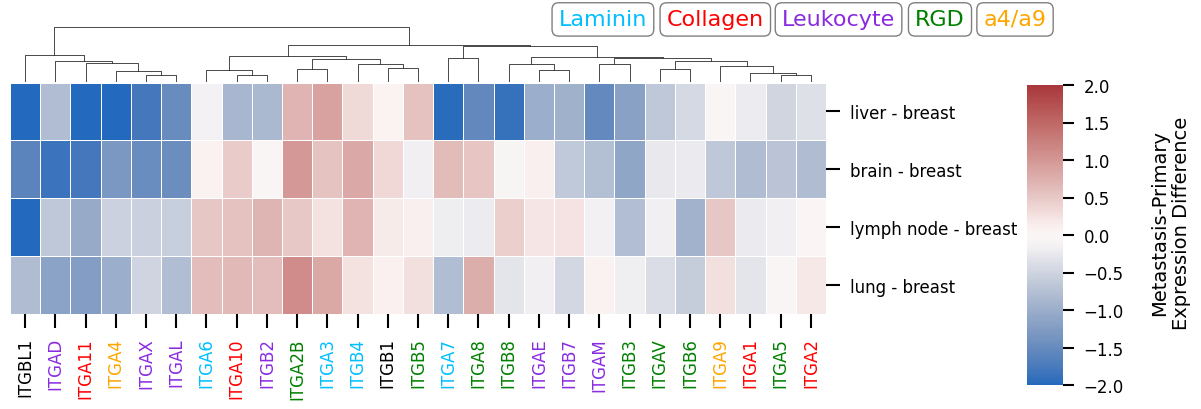

In [71]:
#heatmap_df = itg_expr_df[itg_expr_df.columns[(itg_expr_df.columns.str.contains('relative')) | (itg_expr_df.columns.str.contains('primtum_mean'))]].copy()
heatmap_df = itg_expr_df[itg_expr_df.columns[itg_expr_df.columns.str.contains('relative')]].copy()
#convert to Z-score
#heatmap_df = (heatmap_df-heatmap_df.mean())/heatmap_df.std()

#rename columns using this map
col_map={}
col_map['primtum_mean'] = 'primary tumor' 
col_map['liver_relative_expression'] = 'liver - breast' 
col_map['lymphnode_relative_expression'] = 'lymph node - breast' 
col_map['brain_relative_expression'] = 'brain - breast' 
col_map['lung_relative_expression'] = 'lung - breast' 

#rename columns
heatmap_df = heatmap_df.rename(columns = col_map).copy()


ax = sns.clustermap(heatmap_df.T, cmap='vlag', row_cluster=True, col_cluster=True,
                    method='average', metric='cityblock', linewidths=0.5, vmin=-2,vmax=2,
                    fmt='', figsize=(12,4), tree_kws={'colors':'black'},
                    annot_kws={"size": 20},cbar_kws={'orientation':'vertical'})
                                                        #, xticklabels=False

ax.tick_params(axis='x', labelrotation=90, labelsize=12, size=10, width=1.5, pad=7)

#color tick labels
for tick_label in ax.ax_heatmap.axes.get_xticklabels():
    if tick_label.get_text() in itg_rec_motif.keys():
        tick_label.set_color(itg_color_rec[itg_rec_motif[tick_label.get_text()]])
        
#add legend for receptor

receptor_a = []
for recep_ in itg_color_rec.keys():
    print(f'check legend for {recep_}')
    receptor_a.append(recep_)


plt.text(-13, 1.2, receptor_a[0],fontsize=16,color=itg_color_rec[receptor_a[0]],transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(-10, 1.2, receptor_a[1],fontsize=16,color=itg_color_rec[receptor_a[1]],transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))    
plt.text(-6.8, 1.2, receptor_a[2],fontsize=16,color=itg_color_rec[receptor_a[2]],transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))    
plt.text(-3.1, 1.2, receptor_a[3],fontsize=16,color=itg_color_rec[receptor_a[3]],transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))    
plt.text(-1.2, 1.2, receptor_a[4],fontsize=16,color=itg_color_rec[receptor_a[4]],transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))    
    
ax.tick_params(axis='y', labelrotation=0, labelsize=12, size=10, width=1.5, pad=7)
ax.ax_heatmap.set_xlabel('')

ax.ax_cbar.set_position([1.03, 0.06, 0.03, 0.75])
ax.ax_cbar.set_title('Metastasis-Primary\nExpression Difference', pad=0, rotation=90,
                     y=0.2, x=4).set_size(14)
ax.ax_cbar.tick_params(axis='y', length = 8, rotation=0, labelsize=12)


ax.ax_row_dendrogram.set_visible(False) 
#ax.ax_col_dendrogram.set_visible(True) 
#plt.savefig(f'AURORA_figures/primary_metastasis_expr_diff_heatmap.png', dpi = 1000, bbox_inches='tight')
del heatmap_df,col_map

generating this plot without the receptor information for BJC reports submission


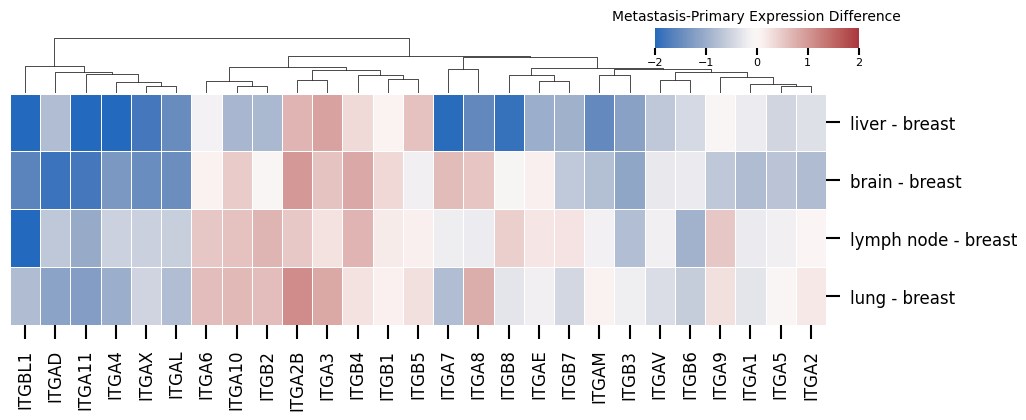

In [95]:
#heatmap_df = itg_expr_df[itg_expr_df.columns[(itg_expr_df.columns.str.contains('relative')) | (itg_expr_df.columns.str.contains('primtum_mean'))]].copy()
heatmap_df = itg_expr_df[itg_expr_df.columns[itg_expr_df.columns.str.contains('relative')]].copy()
#convert to Z-score
#heatmap_df = (heatmap_df-heatmap_df.mean())/heatmap_df.std()

print('generating this plot without the receptor information for BJC reports submission')

#rename columns
#rename columns using this map
col_map={}
col_map['primtum_mean'] = 'primary tumor' 
col_map['liver_relative_expression'] = 'liver - breast' 
col_map['lymphnode_relative_expression'] = 'lymph node - breast' 
col_map['brain_relative_expression'] = 'brain - breast' 
col_map['lung_relative_expression'] = 'lung - breast' 


heatmap_df = heatmap_df.rename(columns = col_map).copy()


ax = sns.clustermap(heatmap_df.T, cmap='vlag', row_cluster=True, col_cluster=True,
                    method='average', metric='cityblock', linewidths=0.5, vmin=-2,vmax=2,
                    fmt='', figsize=(12,4), tree_kws={'colors':'black'},cbar_kws = {'orientation':'horizontal'},
                    annot_kws={"size": 20})
                                                        #, xticklabels=False

ax.tick_params(axis='x', labelrotation=90, labelsize=12, size=10, width=1.5, pad=7)

    
ax.tick_params(axis='y', labelrotation=0, labelsize=12, size=10, width=1.5, pad=7)
ax.ax_heatmap.set_xlabel('')

x0, _y0, _w, _h = ax.cbar_pos
ax.ax_cbar.set_position([x0+0.7, 0.93, ax.ax_row_dendrogram.get_position().width, 0.05])
ax.ax_cbar.set_title('Metastasis-Primary Expression Difference',fontsize=10)
ax.ax_cbar.tick_params(axis='x', length=5,rotation=0,pad=1,labelsize=8)
# for spine in ax.ax_cbar.spines:
#     ax.ax_cbar.spines[spine].set_color('crimson')
#     ax.ax_cbar.spines[spine].set_linewidth(2)

#ax.ax_cbar.set_position([1.03, 0.06, 0.03, 0.75])
#ax.ax_cbar.set_title('Metastasis-Primary\nExpression Difference', pad=0, rotation=90,
#                     y=0.2, x=3.3).set_size(14)
#ax.ax_cbar.tick_params(axis='y', length = 8, rotation=0, labelsize=12)


ax.ax_row_dendrogram.set_visible(False) 
#ax.ax_col_dendrogram.set_visible(True) 
plt.savefig(f'AURORA_figures/primary_metastasis_expr_diff_heatmap.png', dpi = 1000, bbox_inches='tight')
del heatmap_df,col_map

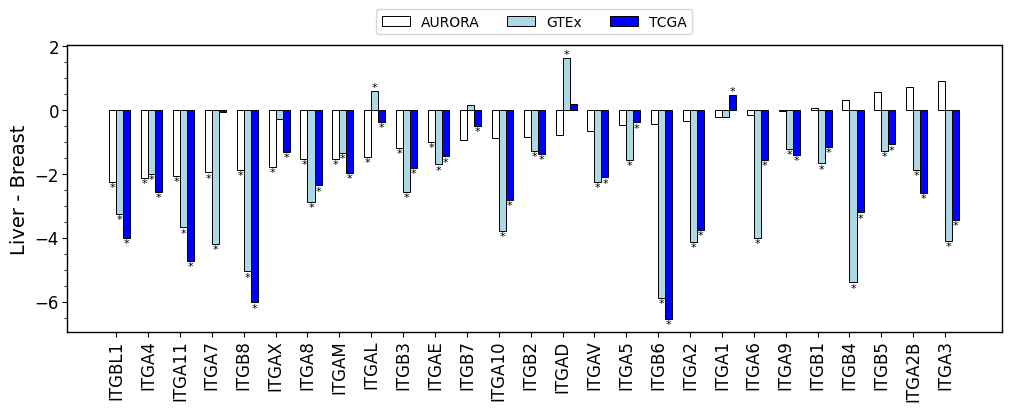

In [97]:
gtex_itg_expr_df = pd.read_csv('./gtex_and_tcga/GTEx_liver_lung_expr_diff.csv').set_index('integrin')
tcga_prim_itg_expr_df = pd.read_csv('./gtex_and_tcga/TCGA_primtum_liver_lung_expr_diff.csv').set_index('integrin')

rel_AURORA_gtex_tcga = pd.DataFrame()
rel_AURORA_gtex_tcga['AURORA_liver_relative_expression'] = itg_expr_df['liver_relative_expression']
rel_AURORA_gtex_tcga['AURORA_adj_liver_significant_bonf'] = itg_expr_df['adj_liver_significant_bonf']

rel_AURORA_gtex_tcga['GTEx_liver_relative_expression'] = gtex_itg_expr_df['relative_expression_liver']
rel_AURORA_gtex_tcga['GTEx_adj_liver_significant_bonf'] = gtex_itg_expr_df['adj_liver_significant_bonf']

rel_AURORA_gtex_tcga['TCGA_liver_relative_expression'] = tcga_prim_itg_expr_df['relative_expression_liver']
rel_AURORA_gtex_tcga['TCGA_adj_liver_significant_bonf'] = tcga_prim_itg_expr_df['adj_liver_significant_bonf']

del gtex_itg_expr_df, tcga_prim_itg_expr_df

labels=[]
rel_AURORA_liver = []
rel_gtex_liver = []
rel_tcga_liver = []

for integrin in rel_AURORA_gtex_tcga.index.values:
    labels.append(str(integrin))
    rel_AURORA_liver.append(rel_AURORA_gtex_tcga['AURORA_liver_relative_expression'].loc[integrin])
    rel_gtex_liver.append(rel_AURORA_gtex_tcga['GTEx_liver_relative_expression'].loc[integrin])    
    rel_tcga_liver.append(rel_AURORA_gtex_tcga['TCGA_liver_relative_expression'].loc[integrin])    

#combining two values
rel_AURORA_gtex_tcga_combined={'AURORA':rel_AURORA_liver,
                       'GTEx':rel_gtex_liver,
                        'TCGA':rel_tcga_liver}

hatches_list= ['||', '|*', '/o', '+o', 'x*', 'o-', 'O|', 'O.', '*-']    
x = np.arange(len(labels))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0
color_binary_list=['white','lightblue','blue']
fig, ax = plt.subplots(layout='constrained',figsize=(10,4))

for attribute, measurement in rel_AURORA_gtex_tcga_combined.items():
    
    offset = width * multiplier
    rects = ax.bar(x + offset, 
                   measurement,
                   width,
                   label=attribute,zorder=0,#,hatch=hatches_list[multiplier]
                  color=color_binary_list[multiplier], edgecolor='black',linewidth=0.7)
    #ax.bar_label(rects, padding=3)
    for bar,integrin in zip(rects.patches,labels):
        if 'AURORA' in attribute:
            if rel_AURORA_gtex_tcga.loc[integrin]['AURORA_adj_liver_significant_bonf']=='yes':
                #print(integrin,bar.get_height())
                if bar.get_height()>=0:            
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,3), ha='center', va='center',
                               size=8,textcoords='offset points')
                elif bar.get_height()<0:
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,-4), ha='center', va='center',
                               size=8,textcoords='offset points')
        elif 'GTEx' in attribute:
            if rel_AURORA_gtex_tcga.loc[integrin]['GTEx_adj_liver_significant_bonf']=='yes':
                #print(integrin,bar.get_height())
                if bar.get_height()>=0:            
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,3), ha='center', va='center',
                               size=8,textcoords='offset points')
                elif bar.get_height()<0:
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,-4), ha='center', va='center',
                               size=8,textcoords='offset points')                    
        elif 'TCGA' in attribute:
            if rel_AURORA_gtex_tcga.loc[integrin]['TCGA_adj_liver_significant_bonf']=='yes':
                #print(integrin,bar.get_height())
                if bar.get_height()>=0:            
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,3), ha='center', va='center',
                               size=8,textcoords='offset points')
                elif bar.get_height()<0:
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,-4), ha='center', va='center',
                               size=8,textcoords='offset points')                                        

    
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_xlabel('Integrin',fontsize=14)
ax.set_ylabel('Liver - Breast',fontsize=14)
#ax.set_title('Penguin attributes by labels')
ax.set_xticks(x + (0.5*width) , labels,fontsize=12,rotation=90)
plt.setp(ax.get_yticklabels(),fontsize=12)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1)
    
#ax.minorticks_on()
#ax.yaxis.set_minor_locator(AutoMinorLocator())
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=12, width = 0.8,pad=2)
ax.tick_params(axis='y', which='minor', width = 0.6)    
ax.tick_params(axis='x', which='minor', bottom=False)

#keeping legend but will crop out from manuscript document and write it in the figure caption. 
ax.legend(fontsize=10,ncol=3,
          bbox_to_anchor=(0.5, 1.15),loc='upper center')

del rel_AURORA_gtex_tcga, rel_AURORA_liver, rel_gtex_liver, rel_AURORA_gtex_tcga_combined
plt.savefig(f'AURORA_figures/AURORA_breast_liver_expr_diff_barplot.png', dpi = 1000, bbox_inches='tight')


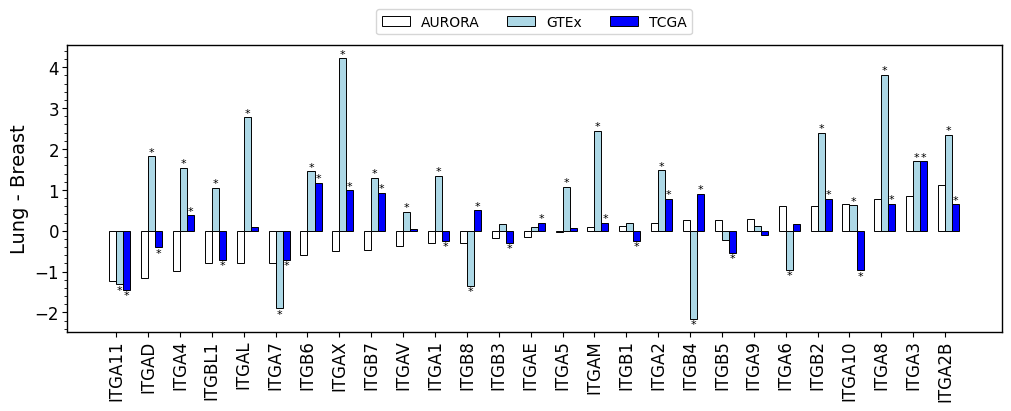

In [98]:
gtex_itg_expr_df = pd.read_csv('./gtex_and_tcga/GTEx_liver_lung_expr_diff.csv').set_index('integrin')
tcga_prim_itg_expr_df = pd.read_csv('./gtex_and_tcga/TCGA_primtum_liver_lung_expr_diff.csv').set_index('integrin')

rel_AURORA_gtex_tcga = pd.DataFrame()
rel_AURORA_gtex_tcga['AURORA_lung_relative_expression'] = itg_expr_df['lung_relative_expression']
rel_AURORA_gtex_tcga['AURORA_adj_lung_significant_bonf'] = itg_expr_df['adj_lung_significant_bonf']

rel_AURORA_gtex_tcga['GTEx_lung_relative_expression'] = gtex_itg_expr_df['relative_expression_lung']
rel_AURORA_gtex_tcga['GTEx_adj_lung_significant_bonf'] = gtex_itg_expr_df['adj_lung_significant_bonf']

rel_AURORA_gtex_tcga['TCGA_lung_relative_expression'] = tcga_prim_itg_expr_df['relative_expression_lung']
rel_AURORA_gtex_tcga['TCGA_adj_lung_significant_bonf'] = tcga_prim_itg_expr_df['adj_lung_significant_bonf']

rel_AURORA_gtex_tcga = rel_AURORA_gtex_tcga.sort_values(by='AURORA_lung_relative_expression').copy()

del gtex_itg_expr_df, tcga_prim_itg_expr_df

labels=[]
rel_AURORA_lung = []
rel_gtex_lung = []
rel_tcga_lung = []

for integrin in rel_AURORA_gtex_tcga.index.values:
    labels.append(str(integrin))
    rel_AURORA_lung.append(rel_AURORA_gtex_tcga['AURORA_lung_relative_expression'].loc[integrin])
    rel_gtex_lung.append(rel_AURORA_gtex_tcga['GTEx_lung_relative_expression'].loc[integrin])    
    rel_tcga_lung.append(rel_AURORA_gtex_tcga['TCGA_lung_relative_expression'].loc[integrin])    

#combining two values
rel_AURORA_gtex_tcga_combined={'AURORA':rel_AURORA_lung,
                       'GTEx':rel_gtex_lung,
                        'TCGA':rel_tcga_lung}

hatches_list= ['||', '|*', '/o', '+o', 'x*', 'o-', 'O|', 'O.', '*-']    
x = np.arange(len(labels))  # the label locations
width = 0.22  # the width of the bars
multiplier = 0
color_binary_list=['white','lightblue','blue']
fig, ax = plt.subplots(layout='constrained',figsize=(10,4))

for attribute, measurement in rel_AURORA_gtex_tcga_combined.items():
    
    offset = width * multiplier
    rects = ax.bar(x + offset, 
                   measurement,
                   width,
                   label=attribute,zorder=0,#,hatch=hatches_list[multiplier]
                  color=color_binary_list[multiplier], edgecolor='black',linewidth=0.7)
    #ax.bar_label(rects, padding=3)
    for bar,integrin in zip(rects.patches,labels):
        if 'AURORA' in attribute:
            if rel_AURORA_gtex_tcga.loc[integrin]['AURORA_adj_lung_significant_bonf']=='yes':
                #print(integrin,bar.get_height())
                if bar.get_height()>=0:            
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,3), ha='center', va='center',
                               size=8,textcoords='offset points')
                elif bar.get_height()<0:
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,-4), ha='center', va='center',
                               size=8,textcoords='offset points')
        elif 'GTEx' in attribute:
            if rel_AURORA_gtex_tcga.loc[integrin]['GTEx_adj_lung_significant_bonf']=='yes':
                #print(integrin,bar.get_height())
                if bar.get_height()>=0:            
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,3), ha='center', va='center',
                               size=8,textcoords='offset points')
                elif bar.get_height()<0:
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,-4), ha='center', va='center',
                               size=8,textcoords='offset points')                    
        elif 'TCGA' in attribute:
            if rel_AURORA_gtex_tcga.loc[integrin]['TCGA_adj_lung_significant_bonf']=='yes':
                #print(integrin,bar.get_height())
                if bar.get_height()>=0:            
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,3), ha='center', va='center',
                               size=8,textcoords='offset points')
                elif bar.get_height()<0:
                    ax.annotate('*',
                               (bar.get_x() + bar.get_width()/2,
                                bar.get_height()),xytext=(0,-4), ha='center', va='center',
                               size=8,textcoords='offset points')                                        

    
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_xlabel('Integrin',fontsize=14)
ax.set_ylabel('Lung - Breast',fontsize=14)
#ax.set_title('Penguin attributes by labels')
ax.set_xticks(x + (0.5*width) , labels,fontsize=12,rotation=90)
plt.setp(ax.get_yticklabels(),fontsize=12)

for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1)
    
#ax.minorticks_on()
#ax.yaxis.set_minor_locator(AutoMinorLocator())
    
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=12, width = 0.8,pad=2)
ax.tick_params(axis='y', which='minor', width = 0.6)    
ax.tick_params(axis='x', which='minor', bottom=False)

#keeping legend but will crop out from manuscript document and write it in the figure caption. 
ax.legend(fontsize=10,ncol=3,
          bbox_to_anchor=(0.5, 1.15),loc='upper center')

del rel_AURORA_gtex_tcga, rel_AURORA_lung, rel_gtex_lung, rel_AURORA_gtex_tcga_combined
plt.savefig(f'AURORA_figures/AURORA_breast_lung_expr_diff_barplot.png', dpi = 1000, bbox_inches='tight')


MUST be ONLY for LIVER. DO NOT CHANGE CODE
ITGBL1 -2.2609656795685034
ITGA4 -2.124226185533388
ITGA11 -2.0528356796394185
ITGA7 -1.9545535431972834
ITGB8 -1.8805829855733034
ITGAX -1.782479226674134
ITGA8 -1.533379147357083
ITGAM -1.525659259690359
ITGAL -1.4724911831718064
ITGB3 -1.1825136080985388
ITGAE -0.9979502423565787


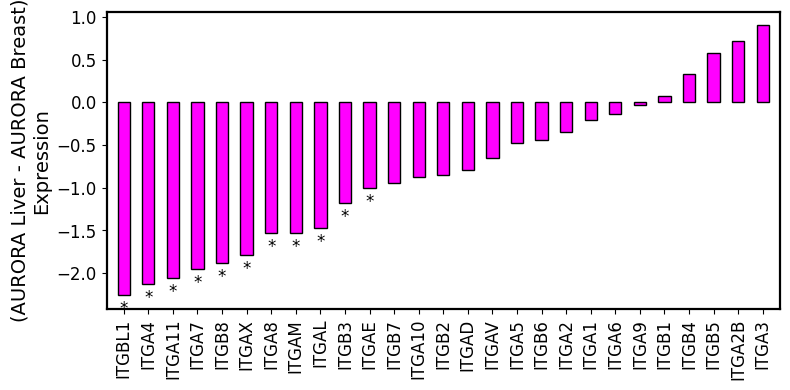

In [40]:
print('MUST be ONLY for LIVER. DO NOT CHANGE CODE')
fig, ax = plt.subplots(figsize=(8,4))
labels = itg_expr_df.sort_values(by='liver_relative_expression').index.to_list()
num_items = len(labels)
width = 0.5  # the width of the bars
margin = 0.2
x = np.arange(num_items)  # the label locations

rects1 = ax.bar(x,
                itg_expr_df.sort_values(by='liver_relative_expression').liver_relative_expression.values, width,
                capsize=4,color='magenta',linewidth=1,edgecolor='black')

for bar,integrin in zip(rects1.patches,labels):
    if itg_expr_df.loc[integrin]['adj_liver_significant_bonf']=='yes':
        print(integrin,bar.get_height())
        if bar.get_height()>=0:            
            ax.annotate('*',
                       (bar.get_x() + bar.get_width()/2,
                        bar.get_height()),xytext=(0,6), ha='center', va='center',
                       size=12,textcoords='offset points')
        elif bar.get_height()<0:
            ax.annotate('*',
                       (bar.get_x() + bar.get_width()/2,
                        bar.get_height()),xytext=(0,-10), ha='center', va='center',
                       size=12,textcoords='offset points')

ax.set_ylabel('(AURORA Liver - AURORA Breast)\nExpression',fontsize=14)

ax.set_xticks(x)


ax.set_xlim(x.min()-width-margin,x.max()+width+margin)
ax.set_xticklabels(labels,fontsize=12,rotation=90)
plt.setp(ax.get_yticklabels(),fontsize=12)

#ax.legend(fontsize=15,edgecolor ='inherit')

for i in ['top', 'left', 'right', 'bottom']:
        ax.spines[i].set_linewidth(1.6)
        
fig.tight_layout()
#plt.savefig(f'AURORA_figures/AURORA_breast_liver_expr_diff_barplot.png', dpi = 1000, bbox_inches='tight')


In [32]:
del temp_aur_bcm_df, temp_info_sample, primtum_temp_info_sample, met_temp_info_sample,itg_expr_df

# metastasis vs primary tumor integrin expression(only lung, liver, lymph node, breast, brain)


In [21]:

chosen_sites = ['Liver','Lymph node','Brain','Lung','Breast']

#remove normal tissue and primary tumor
temp_info_sample = geo_clin_matrix[(geo_clin_matrix.source_name_ch1!='Normal tissue')].copy()

#remove unwanted metastasis sites
temp_info_sample = temp_info_sample[temp_info_sample['characteristics_ch1.1.tissue'].isin(chosen_sites)]

#now separate primary tumor from metastasis
primtum_temp_info_sample = temp_info_sample[temp_info_sample.source_name_ch1=='Primary tumor']


met_temp_info_sample = temp_info_sample[(temp_info_sample.source_name_ch1=='Metastatic tumor') & (temp_info_sample['characteristics_ch1.1.tissue'].isin(chosen_sites))]


#gene expression
temp_aur_bcm_df = geo_expr[temp_info_sample['sample_id']].copy()
del chosen_sites


In [22]:
#add sample category information to temp_aur_bcm_df

temp_aur_bcm_df.loc['sample_cat'] = [met_temp_info_sample['source_name_ch1'].unique()[0] if samid in met_temp_info_sample['sample_id'].values else primtum_temp_info_sample['source_name_ch1'].unique()[0] if samid in primtum_temp_info_sample['sample_id'].values else 0 for samid in temp_aur_bcm_df.columns]

if 0 in temp_aur_bcm_df.loc['sample_cat'].values:
    print('ERROR plz check')

    
#add sample location information to temp_aur_bcm_df

temp_aur_bcm_df.loc['sample_loc'] = [temp_info_sample[temp_info_sample['sample_id']==samid]['characteristics_ch1.1.tissue'].values[0] for samid in temp_aur_bcm_df.columns]

    

In [23]:
#filter to just get integrins
itg_temp_aur_bcm_df = temp_aur_bcm_df.loc[itg_expr.index.to_list()+['sample_cat']+['sample_loc']].copy()

itg_temp_aur_bcm_df

,AUR-AFEA-TTP1-A-1-0-R-A741-41,AUR-AFEA-TTM4-A-1-1-R-A742-41,AUR-AFEA-TTM2-A-1-1-R-A742-41,AUR-AFEA-TTM1-A-1-1-R-A742-41,AUR-AFEA-TTM3-A-1-1-R-A742-41,AUR-AFEA-TTM6-A-1-0-R-A741-41,AUR-AFE7-TTP2-A-1-1-R-A742-41,AUR-AFE7-TTM2-A-1-1-R-A742-41,AUR-AFE7-TTM1-A-1-1-R-A742-41,AUR-AFE7-TTM3-A-1-1-R-A742-41,...,AUR-AERY-TTM1-A-1-1-R-A742-41,AUR-ADCB-TTM1-A-1-1-R-A742-41,AUR-AD9I-TTM3-A-1-1-R-A542-39,AUR-AFUK-TTM2-A-1-0-R-A743-41,AUR-AD9E-TTM4-A-1-1-R-A542-39,AUR-AD9E-TTM2-A-1-1-R-A542-39,AUR-AD9H-TTM3-A-1-1-R-A542-39,AUR-AD9H-TTM2-A-1-1-R-A542-39,AUR-AD9F-TTM1-A-1-1-R-A542-39,AUR-AD9F-TTM2-A-1-1-R-A542-39
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ITGA10,9.042163,9.058264,10.066458,10.31353,10.100056,8.985996,10.118316,9.676966,10.214833,9.234469,...,7.14919,9.730793,7.873125,8.877756,7.732702,8.028988,7.179643,7.755967,8.890847,8.456701
ITGB6,10.12697,11.540429,11.569799,11.859223,12.131739,11.786744,10.371864,10.27312,9.57601,8.770896,...,12.906397,15.726461,10.976644,6.363179,6.704182,9.516603,8.848064,7.741008,11.85204,10.837845
ITGA6,12.354065,12.901162,13.543532,13.347392,13.153614,12.764451,15.72765,17.23652,16.51524,15.699356,...,12.081104,13.266148,13.129981,12.650793,12.626468,12.337788,11.744745,11.485181,12.85514,13.092984
ITGA4,11.313245,9.471967,9.988855,9.285913,10.611934,12.727867,10.090326,10.396719,9.884466,9.240648,...,10.489066,9.189933,9.547916,11.101089,8.501617,9.075709,7.764987,6.883338,8.670399,11.499138
ITGAV,12.640647,13.028463,14.282213,13.451376,13.969347,13.227486,14.433413,15.477171,14.80075,13.898188,...,14.556518,13.809454,13.684292,14.082399,12.040483,12.302638,11.93467,11.947085,13.555437,13.448019
ITGA9,11.58792,11.13298,10.561817,11.803337,11.469579,11.654677,12.059868,12.300939,11.891313,11.431236,...,10.930781,9.629507,10.784774,11.031691,10.786551,10.550577,9.556161,8.744264,10.695208,11.875802
ITGB5,11.198523,11.919809,11.909761,12.693756,11.857207,10.324696,12.846703,13.439886,12.542287,11.809658,...,13.659331,13.201805,12.985266,13.956263,12.165784,12.471627,12.863606,13.730693,13.380947,12.797366
ITGA1,13.388093,12.23614,11.499163,10.708658,12.966045,13.221693,12.713831,12.644359,11.938906,11.760282,...,12.966799,11.101721,13.123352,12.443875,12.539817,12.849973,11.662223,9.720803,12.858207,12.907301
ITGA2,11.137547,10.914379,11.701941,10.131587,12.387209,11.918825,12.717717,12.555148,12.233563,12.085991,...,12.541111,13.284993,11.270535,11.873215,10.032694,10.571885,11.700443,11.403502,11.763607,11.245455


In [24]:
itg_temp_aur_bcm_df.loc['sample_loc'].value_counts()

sample_loc
Breast        44
Liver         18
Lymph node    11
Brain          9
Lung           8
Name: count, dtype: int64

In [25]:
#melt dataframe for split violin plot
j=0
for integrin in itg_expr.index:
    if j==0:
        itg_vp_df = pd.DataFrame(zip(np.repeat(integrin,
                                               itg_temp_aur_bcm_df.loc[integrin].values.shape[0]),
                                     itg_temp_aur_bcm_df.loc[integrin].values,
                                    itg_temp_aur_bcm_df.loc[integrin].index.to_list()),
                                 columns=['integrin','expression','sample_id']).copy()
    else:
        temp_df = pd.DataFrame(zip(np.repeat(integrin,
                                               itg_temp_aur_bcm_df.loc[integrin].values.shape[0]),
                                     itg_temp_aur_bcm_df.loc[integrin].values,
                                  itg_temp_aur_bcm_df.loc[integrin].index.to_list()),
                                 columns=['integrin','expression','sample_id']).copy()
        itg_vp_df = pd.concat([itg_vp_df,temp_df]).copy()
        del temp_df
    j+=1
    
itg_vp_df['sample_cat'] = [itg_temp_aur_bcm_df[sampid].loc['sample_cat'] for sampid in itg_vp_df['sample_id'].values]
itg_vp_df['sample_loc'] = [itg_temp_aur_bcm_df[sampid].loc['sample_loc'] for sampid in itg_vp_df['sample_id'].values]
itg_vp_df

,integrin,expression,sample_id,sample_cat,sample_loc
0,ITGA10,9.042163,AUR-AFEA-TTP1-A-1-0-R-A741-41,Primary tumor,Breast
1,ITGA10,9.058264,AUR-AFEA-TTM4-A-1-1-R-A742-41,Metastatic tumor,Lymph node
2,ITGA10,10.066458,AUR-AFEA-TTM2-A-1-1-R-A742-41,Metastatic tumor,Brain
3,ITGA10,10.313530,AUR-AFEA-TTM1-A-1-1-R-A742-41,Metastatic tumor,Brain
4,ITGA10,10.100056,AUR-AFEA-TTM3-A-1-1-R-A742-41,Metastatic tumor,Lung
...,...,...,...,...,...
85,ITGB2,9.345578,AUR-AD9E-TTM2-A-1-1-R-A542-39,Metastatic tumor,Lung
86,ITGB2,8.223960,AUR-AD9H-TTM3-A-1-1-R-A542-39,Metastatic tumor,Liver
87,ITGB2,7.785428,AUR-AD9H-TTM2-A-1-1-R-A542-39,Metastatic tumor,Liver
88,ITGB2,11.085073,AUR-AD9F-TTM1-A-1-1-R-A542-39,Metastatic tumor,Liver


In [27]:
#ONLY get metastatic samples, FROM lung,liver,brain, lymph node
chosen_sites = ['Liver','Lymph node','Brain','Lung','Breast']
met_temp_aur = temp_aur_bcm_df.loc[:,  temp_aur_bcm_df.loc['sample_loc'].isin(chosen_sites)].copy()
del chosen_sites



In [28]:
print('TUKEY dataframe acts weird')
itg_anova_pval={'integrin':[],'uncorrected_anova_pvalue':[]}
p_value_cutoff = 0.05
j=0
for integrin in itg_expr.index:
    breast_expr_primtum = met_temp_aur.loc[:,met_temp_aur.loc['sample_loc']=='Breast'].loc[integrin].values
    lung_expr_met = met_temp_aur.loc[:,met_temp_aur.loc['sample_loc']=='Lung'].loc[integrin].values
    liver_expr_met = met_temp_aur.loc[:,met_temp_aur.loc['sample_loc']=='Liver'].loc[integrin].values
    lymphnode_expr_met = met_temp_aur.loc[:,met_temp_aur.loc['sample_loc']=='Lymph node'].loc[integrin].values
    brain_expr_met = met_temp_aur.loc[:,met_temp_aur.loc['sample_loc']=='Brain'].loc[integrin].values
    
    anova_df = pd.DataFrame({'expression': np.concatenate([breast_expr_primtum,lung_expr_met,liver_expr_met,
                                                         lymphnode_expr_met,brain_expr_met]),
                           'sample_loc':np.concatenate([np.repeat('Breast',len(breast_expr_primtum)),
                                                        np.repeat('Lung',len(lung_expr_met)),
                                                       np.repeat('Liver',len(liver_expr_met)),
                                                       np.repeat('Lymph node',len(lymphnode_expr_met)),
                                                       np.repeat('Brain',len(brain_expr_met))])})
    # perform Tukey's test
    tukey = pairwise_tukeyhsd(endog=anova_df['expression'].astype('float64'),
                              groups=anova_df['sample_loc'],
                              alpha=0.05)

    anova_pval = f_oneway(breast_expr_primtum,
                          lung_expr_met,
                          liver_expr_met,
                          lymphnode_expr_met,
                          brain_expr_met).pvalue
    
    itg_anova_pval['integrin'].append(integrin)
    itg_anova_pval['uncorrected_anova_pvalue'].append(anova_pval)
    
    #display results
    print(f'For Integrin: {integrin}')
    print( format(anova_pval,
                 '0.4f'))
    del anova_pval
    print(tukey)
    
    if j==0:
        anova_results = pd.DataFrame(tukey.summary()).copy()
        anova_results = anova_results.rename(columns=anova_results.iloc[0].astype('str')).drop(0).reset_index(drop=True)
        anova_results['integrin'] = np.repeat(integrin,anova_results.shape[0])
    elif j>0:
        running_anova = pd.DataFrame(tukey.summary()).copy()
        running_anova = running_anova.rename(columns=running_anova.iloc[0].astype('str')).drop(0).reset_index(drop=True)
        running_anova['integrin'] = np.repeat(integrin,running_anova.shape[0])
        anova_results = pd.concat([anova_results,
                                   running_anova]).reset_index(drop=True).copy()
        
    j+=1
del anova_df, running_anova

anova_results = anova_results.astype({'group1':'string','group2':'string','reject':'string'}).copy()
itg_anova_pval = pd.DataFrame(itg_anova_pval).copy()
itg_anova_pval['adj_p_val_bonf']=multi.multipletests(itg_anova_pval['uncorrected_anova_pvalue'].values,
                                                     alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)[1]
itg_anova_pval['adj_significant_bonf']=['yes' if p_value<p_value_cutoff else 'no' for p_value in itg_anova_pval['adj_p_val_bonf'].values ]


TUKEY dataframe acts weird
For Integrin: ITGA10
0.0160
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------
 Brain     Breast  -0.4692 0.8675 -1.8161 0.8777  False
 Brain      Liver  -1.3419 0.1029 -2.8449 0.1612  False
 Brain       Lung   0.1822 0.9986 -1.6068 1.9712  False
 Brain Lymph node   0.0963 0.9998 -1.5585 1.7511  False
Breast      Liver  -0.8727 0.1363 -1.9028 0.1574  False
Breast       Lung   0.6514 0.7022 -0.7636 2.0665  False
Breast Lymph node   0.5655 0.7102 -0.6756 1.8066  False
 Liver       Lung   1.5241 0.0599 -0.0403 3.0885  False
 Liver Lymph node   1.4381 0.0431  0.0291 2.8471   True
  Lung Lymph node   -0.086 0.9999 -1.7967 1.6248  False
-------------------------------------------------------
For Integrin: ITGB6
0.8606
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj   lower  upper  reject
----------------------

In [34]:
itg_anova_pval.sort_values(by='adj_p_val_bonf').to_csv('itg_ANOVA_pvalues_adjusted_AURORA.csv')
itg_anova_pval.sort_values(by='adj_p_val_bonf')

,integrin,uncorrected_anova_pvalue,adj_p_val_bonf,adj_significant_bonf
3,ITGA4,9.569229e-09,2.583692e-07,yes
16,ITGA11,2.604485e-08,7.032109e-07,yes
14,ITGA7,5.478447e-07,1.479181e-05,yes
15,ITGBL1,2.498433e-06,6.745769e-05,yes
19,ITGAX,1.254215e-05,3.386380e-04,yes
10,ITGA8,2.071010e-05,5.591726e-04,yes
18,ITGAM,3.305988e-05,8.926166e-04,yes
21,ITGAE,3.108082e-04,8.391821e-03,yes
17,ITGAL,9.458395e-04,2.553767e-02,yes
23,ITGB3,1.108524e-03,2.993014e-02,yes


In [48]:
anova_results[(anova_results.reject=='True') & (anova_results.integrin=='ITGB3')]

,group1,group2,meandiff,p-adj,lower,upper,reject,integrin
234,Breast,Liver,-1.1825,0.002,-2.0366,-0.3284,True,ITGB3


In [36]:
anova_results[(anova_results.reject=='True')].integrin.value_counts()

integrin
ITGA8     4
ITGA4     3
ITGA7     3
ITGBL1    3
ITGA11    3
ITGAM     3
ITGAE     3
ITGB8     2
ITGAX     2
ITGAL     2
ITGA10    1
ITGAV     1
ITGAD     1
ITGB3     1
ITGA3     1
ITGB2     1
Name: count, dtype: int64